# Machine Learning Fall 99 <img src = 'https://ece.ut.ac.ir/cict-theme/images/footer-logo.png' alt="Tehran-University-Logo" width="150" height="150" align="right">
## Final Project : Film Genres Classification for Cafebazaar
### Dr. Abolghasemi and Dr. Araabi
### By Omid Vaheb and Mahsa Massoud

## Introduction:
In this project, after inspecting data, we prepared and normalized it for implementing learning algorithms on it. The most significant barrier in the way was doing preprocessing for texts in persian but we handled it with Hazm library. The final step was to enhance and set hyperparameters for some classification models to get the maximum accuracy and minimum MSE for each model.
## Question:
In order to predict the genre of a film in Cafebazaar's database, we need to build a model using machine learning algorithms. The dataset we used in this project was the real data of films gathered by a company. First we train our models using the given dataset. This dataset consists of video_id(which shows the id of film in database and probably would ot help us in classification), title_fa(title of films in persian which could be helpful),  description_fa(description of films which is the main feature to classify with), age_rating(minimum age to watch the movie), country_fa(showing the country that movie vas produced in), production_year(year of production), duration(showing duration of film), image(showing name of the file containing film's poster, and finaly genre which is the main feature to estimate.

Before anything we import libraries needed in the project. These libraries consist of 3 different groups. First one is the general libraries like pandas and numpy and some learning algorithms which are mostly included in sklearn and scipy. Second group is related to the text processing for example hazm, nltk, and re. The last group are added in orer to do image processing for posters. Generally opencv fulfills our needs of image processing tools.

In [177]:
from __future__ import unicode_literals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
from sklearn.linear_model import LinearRegression, Ridge, LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
import itertools
import gc
!pip install hazm
import hazm
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
!pip install lightgbm
import random
import lightgbm as lgb
from lightgbm import LGBMRegressor
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Then, it is time to import the dataset and inspect it using some simple pandas commands. In this project, we uploded csv files into notebook and imported images from a shortcut link to given google drive link.

In [178]:
from google.colab import files
uploaded = files.upload()

Saving train_set.csv to train_set (1).csv


We sxplore the first ten rows of this dataset to get familiar with its content.

In [179]:
import io
data = pd.read_csv(io.BytesIO(uploaded['train_set.csv']))
data.head(10)

,video_id,title_fa,description_fa,age_rating,country_fa,production_year,duration,genre,image
0,_WuOoL_filimo,نیش,همسر و فرزند خردسال یك سروان نیروی انتظامی، كه...,0.0,ایران,1994.0,01:27:22,action,videos_covers_066f34bc-aaeb-4c74-a78c-83f0250c...
1,yIaxeg8x,سرگذشت حقیقی دار و دسته کلی,درباره فیلم سرگذشت حقیقی دار و دسته کلی فیلم ...,,انگلستان,2020.0,01:46:00,drama,videos_covers_c36937ab-5b60-44f0-8152-01bc6ae6...
2,King_Arthur-Legend_of_the_Sword_4d6P2_filimo,شاه آرتور - افسانه شمشیر,آرتور، مرد جوانی است که در دوران کودکی دزدیده ...,0.0,آمریکا,2017.0,02:04:29,action,videos_covers_128fef8c-2a5a-417e-9061-7d06864f...
3,TJAkVhmb,تارزان و جین,انیمیشن تارزان و جین به ماجرای تارزان و آشنایی...,7.0,آمریکا,2017.0,,adventure,videos_covers_f0b8492b-5e94-4cc4-9bec-dcf93e08...
4,Life_Cycles_0ym29_filimo,چرخ عمر,مستند چرخ عمر داستانی در مورد یک دوچرخه کوهستا...,13.0,کانادا,2010.0,00:46:58,documentary,videos_covers_965f947c-ee7d-4851-9fa5-ba303524...
5,aBKtoyUr,پترسون,NaN,,آمریکا,2016.0,01:48:00,romance,videos_covers_11538b88-6747-4a73-8899-bc96b48c...
6,_BERnr_filimo,کلانتری غیر انتفاعی,فیلم درباره یک کلانتری غیر انتفاعی است که وظیف...,13.0,ایران,2008.0,01:33:33,family,videos_covers_6e6bd900-87a9-4efa-8b6d-726f61ef...
7,_Lx9Er_filimo,شنگول و منگول,یك خانم معلم در یك گردش تفریحی داستان شنگول و ...,3.0,ایران,1989.0,01:17:51,family,videos_covers_ba4ab7b7-fefb-4aa6-8c81-7dbfece2...
8,v5BoTo2W,بچه رییس,NaN,,آمریکا,2017.0,01:38:00,adventure,videos_covers_c71083b2-e351-4886-8ec9-6457ae0d...
9,Love_and_Bullets_RQgUT_filimo,عشق و گلوله ها,یک پلیس آریزونا به سوییس فرستاده می شود تا نام...,13.0,آمریکا,1979.0,01:36:04,action,videos_covers_c5f09d40-1077-4757-87ac-8995bfb4...


A noteworthy observation is that every cell of this dataset have the format of object so we need a transfer for each one when we are processing it.

In [180]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   video_id         11000 non-null  object
 1   title_fa         11000 non-null  object
 2   description_fa   8559 non-null   object
 3   age_rating       11000 non-null  object
 4   country_fa       10882 non-null  object
 5   production_year  11000 non-null  object
 6   duration         11000 non-null  object
 7   genre            11000 non-null  object
 8   image            11000 non-null  object
dtypes: object(9)
memory usage: 773.6+ KB


We checked the statistical features of dataset in this part using describe.

In [181]:
data.describe()

,video_id,title_fa,description_fa,age_rating,country_fa,production_year,duration,genre,image
count,11000,11000,8559,11000,10882,11000,11000,11000,11000
unique,11000,9362,8376,6,86,146,3914,10,11000
top,The_Long_Walk_Home_3nMBV_filimo,بازی,داستان فعالیت کاراگاه جیمز گوردون و چگونگی پیش...,17.0,آمریکا,2019.0,,action,videos_covers_f4ba3c37-74e5-4bfd-abb2-557479bb...
freq,1,7,23,3387,3601,1066,871,2353,1


It is obvious that video_id is not a helpful feature for us and we cannot extract usuful information from it like description and title so we drop this column.

In [182]:
data = data.drop(columns = ['video_id'])
data.head(10)

,title_fa,description_fa,age_rating,country_fa,production_year,duration,genre,image
0,نیش,همسر و فرزند خردسال یك سروان نیروی انتظامی، كه...,0.0,ایران,1994.0,01:27:22,action,videos_covers_066f34bc-aaeb-4c74-a78c-83f0250c...
1,سرگذشت حقیقی دار و دسته کلی,درباره فیلم سرگذشت حقیقی دار و دسته کلی فیلم ...,,انگلستان,2020.0,01:46:00,drama,videos_covers_c36937ab-5b60-44f0-8152-01bc6ae6...
2,شاه آرتور - افسانه شمشیر,آرتور، مرد جوانی است که در دوران کودکی دزدیده ...,0.0,آمریکا,2017.0,02:04:29,action,videos_covers_128fef8c-2a5a-417e-9061-7d06864f...
3,تارزان و جین,انیمیشن تارزان و جین به ماجرای تارزان و آشنایی...,7.0,آمریکا,2017.0,,adventure,videos_covers_f0b8492b-5e94-4cc4-9bec-dcf93e08...
4,چرخ عمر,مستند چرخ عمر داستانی در مورد یک دوچرخه کوهستا...,13.0,کانادا,2010.0,00:46:58,documentary,videos_covers_965f947c-ee7d-4851-9fa5-ba303524...
5,پترسون,NaN,,آمریکا,2016.0,01:48:00,romance,videos_covers_11538b88-6747-4a73-8899-bc96b48c...
6,کلانتری غیر انتفاعی,فیلم درباره یک کلانتری غیر انتفاعی است که وظیف...,13.0,ایران,2008.0,01:33:33,family,videos_covers_6e6bd900-87a9-4efa-8b6d-726f61ef...
7,شنگول و منگول,یك خانم معلم در یك گردش تفریحی داستان شنگول و ...,3.0,ایران,1989.0,01:17:51,family,videos_covers_ba4ab7b7-fefb-4aa6-8c81-7dbfece2...
8,بچه رییس,NaN,,آمریکا,2017.0,01:38:00,adventure,videos_covers_c71083b2-e351-4886-8ec9-6457ae0d...
9,عشق و گلوله ها,یک پلیس آریزونا به سوییس فرستاده می شود تا نام...,13.0,آمریکا,1979.0,01:36:04,action,videos_covers_c5f09d40-1077-4757-87ac-8995bfb4...


There are some NaN values in this dataset and there are also some cells with space instead of value so we need to replace them with NaN. The next step would be to handle these NaN values using the best method available regarding each case.

In [183]:
data.loc[data.age_rating == " "]

,title_fa,description_fa,age_rating,country_fa,production_year,duration,genre,image
1,سرگذشت حقیقی دار و دسته کلی,درباره فیلم سرگذشت حقیقی دار و دسته کلی فیلم ...,,انگلستان,2020.0,01:46:00,drama,videos_covers_c36937ab-5b60-44f0-8152-01bc6ae6...
5,پترسون,NaN,,آمریکا,2016.0,01:48:00,romance,videos_covers_11538b88-6747-4a73-8899-bc96b48c...
8,بچه رییس,NaN,,آمریکا,2017.0,01:38:00,adventure,videos_covers_c71083b2-e351-4886-8ec9-6457ae0d...
12,نی ژا,NaN,,چین,2019.0,01:49:00,thriller,videos_covers_cce72811-cbe2-4092-bf89-5954c8ac...
13,کابوس,NaN,,آمریکا,2015.0,01:04:00,documentary,videos_covers_802119c4-2ca7-48bf-b0c6-4d642241...
...,...,...,...,...,...,...,...,...
10978,والاس و گرومیت: قضیه قرص نان و مرگ,درباره فیلم والاس و گرومیت: قضیه قرص نان و مرگ...,,انگلستان,2008.0,00:28:00,animation,videos_covers_9e0b5fab-e158-4795-a0be-c7e5d168...
10979,آبراهام لینکلن: شکارچی خون‌ آشام,NaN,,آمریکا,2012.0,01:42:00,action,videos_covers_9ae0c8ac-d632-48d5-8f2d-8ae243cb...
10982,سوختن,NaN,,کره جنوبی,2018.0,02:10:00,drama,videos_covers_b288ebc6-0d52-470c-a999-4f452119...
10983,جامه دران,NaN,,ایران,1393.0,01:46:00,drama,videos_covers_b7d33364-2449-469a-ad7f-99bcf721...


In [184]:
data.loc[data.production_year == " "]

,title_fa,description_fa,age_rating,country_fa,production_year,duration,genre,image
6472,پنگوئن های ماداگاسکار,درباره فیلم: پنگوئن های ماداگاسکار انمیشنی اک...,,آمریکا,,01:03:00,animation,videos_covers_9faf5419-e2bb-4e52-ae3f-6211432b...
7595,لوتر,NaN,,انگلستان,,,thriller,videos_covers_faa07a36-e92e-4ce8-ad9c-120097c3...


In [185]:
data.loc[data.duration == " "]

,title_fa,description_fa,age_rating,country_fa,production_year,duration,genre,image
3,تارزان و جین,انیمیشن تارزان و جین به ماجرای تارزان و آشنایی...,7.0,آمریکا,2017.0,,adventure,videos_covers_f0b8492b-5e94-4cc4-9bec-dcf93e08...
72,حقیقت,واقعیاتی درباره خداوند و خلقت و ایمان و توحید ...,13.0,ایران,2013.0,,documentary,videos_covers_37e4e677-a94c-4b31-aa77-edbedcdd...
79,یک روز زندگی,"مستند ""یک روز زندگی"" مستند مسابقه ای است که در...",7.0,ایران,2017.0,,documentary,videos_covers_0256f18d-bff1-4985-a4d9-6f6fdf18...
108,برداشت های ابراهیم,مستند برداشت های ابراهیم، روایتی است از پشت صح...,13.0,ایران,2018.0,,documentary,videos_covers_06fad3a2-e450-4def-911b-c3e81043...
115,تلاش کردن,تلاش کردن سریالی در ژانر کمدی محصول سال 2020 ا...,17.0,انگلیس,2020.0,,comedy,videos_covers_0a2afd60-75fa-441d-b7e1-4ec1b178...
...,...,...,...,...,...,...,...,...
10972,میلیاردها,یک دادستان آمریکایی باهوش به نام چاک رودز به...,17.0,آمریکا,2016.0,,action,videos_covers_4f021387-7467-48c2-b1a8-9bd8dddd...
10975,مانکن (مخصوص ناشنوایان),سریال مانکن با بازی فرزاد فرزین، امیرحسین آرما...,17.0,ایران,2018.0,,family,videos_covers_19efeba4-b9c0-40c8-9ccb-4cda28d4...
10986,گفتگو با قاتل : نوارهای تد باندی,نگاهی به ذهن قاتل سریالی تد باندی که پیش از اع...,17.0,آمریکا,2019.0,,documentary,videos_covers_e6e2b795-037d-4d42-9f01-1de2f5db...
10989,به من دروغ بگو,به من دروغ بگو نام یک سریال جنایی درام آمریکای...,17.0,آمریکا,2009.0,,action,videos_covers_85d15d79-8fae-441f-ace6-cf7fe87e...


There are 118 rows with NaN value in country_fa column so we can asily drop these rows without losing much information because they are about 1% of size of dataset.

In [186]:
dataframe = data[data['country_fa'].notna()]

Now we replace cells with space instead of value with NaN.

In [187]:
dataframe = dataframe.replace(r'^\s*$', np.NaN, regex=True)

In [188]:
dataframe.isnull().sum()

title_fa              0
description_fa     2440
age_rating         2993
country_fa            0
production_year       2
duration            870
genre                 0
image                 0
dtype: int64

There are only 2 rows with missing production year so we drop these 2.

In [189]:
dataframe = dataframe[dataframe['production_year'].notna()]

Number of missing data for age rating are more than 2000 and we fill these nan values with the mean age restriction of each class which is a prior knowledge for us. There is a barrier in which drama movies do not have any age rating sample so we have to fill it with the meano of age restriction of whole dataset in which is equal to 13.

In [190]:
dataframe['age_rating'] = dataframe['age_rating'].astype(float)
data.loc[(data.genre == "drama")]

,title_fa,description_fa,age_rating,country_fa,production_year,duration,genre,image
1,سرگذشت حقیقی دار و دسته کلی,درباره فیلم سرگذشت حقیقی دار و دسته کلی فیلم ...,,انگلستان,2020.0,01:46:00,drama,videos_covers_c36937ab-5b60-44f0-8152-01bc6ae6...
22,جوآن سرخ,NaN,,انگلستان,2018.0,01:34:00,drama,videos_covers_78494f47-3fd7-4c53-9885-19d3db22...
23,گوئن,NaN,,انگلستان,2019.0,01:24:00,drama,videos_covers_bc1b3e52-9ae2-4df1-81d0-ac340e8e...
27,لایلا و ایو,NaN,,آمریکا,2015.0,01:26:00,drama,videos_covers_27e43f21-e119-42d1-afe1-00cb06a1...
28,جنگ جریان,NaN,,آمریکا,2019.0,01:48:00,drama,videos_covers_c0b04105-1387-491a-b956-e029c8cb...
...,...,...,...,...,...,...,...,...
10961,اعتراف,NaN,,ایران,1396.0,01:57:00,drama,videos_covers_232869cc-726b-4290-a4f2-44e6d242...
10966,کودک در زمان,NaN,,آمریکا,2017.0,01:26:00,drama,videos_covers_3f2be311-448a-407a-b5f5-4b24491f...
10967,انقراض,NaN,,آمریکا,2018.0,01:35:00,drama,videos_covers_5a9252c3-8a8f-46b8-a38a-9c96a350...
10982,سوختن,NaN,,کره جنوبی,2018.0,02:10:00,drama,videos_covers_b288ebc6-0d52-470c-a999-4f452119...


In [191]:
dataframe.groupby('genre')['age_rating'].mean()

genre
action         11.654787
adventure       9.827057
animation       8.763351
comedy         10.330998
documentary    11.705184
drama                NaN
family         13.228501
romance        13.780992
social         14.256334
thriller       14.229462
Name: age_rating, dtype: float64

In [192]:
dataframe['age_rating'] = dataframe.groupby('genre')['age_rating'].transform(lambda x: x.fillna(x.mean()))

In [193]:
dataframe['age_rating'].fillna(dataframe['age_rating'].mean(), inplace = True)
dataframe.groupby('genre')['age_rating'].mean()

genre
action         11.654787
adventure       9.827057
animation       8.763351
comedy         10.330998
documentary    11.705184
drama          11.815461
family         13.228501
romance        13.780992
social         14.256334
thriller       14.229462
Name: age_rating, dtype: float64

In [194]:
dataframe['age_rating'] = dataframe['age_rating'].astype(int)

In [195]:
dataframe['duration'] = pd.to_datetime(dataframe['duration'])

Now we try to handle the duration column. First we convert it to datetime and then we break it to hour and minute and finally we aggregate these 2 into the duration bu minute.

In [196]:
dataframe['hour'] = dataframe['duration'].dt.hour
dataframe['minute'] = dataframe['duration'].dt.minute

In [197]:
def dateHandler(row): 
    row['minute'] += row['hour'] * 60
    return row
dataframe = dataframe.apply(dateHandler, axis = 'columns')
dataframe = dataframe.drop(columns = ['hour', 'duration'])

In [198]:
dataframe['minute'] = dataframe['minute'].replace(0, np.NaN)

Now we fill the nan values of this column with mean of the whole column.

In [199]:
dataframe['minute'] = dataframe['minute'].fillna(dataframe['minute'].mean())
dataframe.isnull().sum()

title_fa              0
description_fa     2439
age_rating            0
country_fa            0
production_year       0
genre                 0
image                 0
minute                0
dtype: int64

In [200]:
dataframe['production_year'] = dataframe['production_year'].astype(float)
dataframe['production_year'] = dataframe['production_year'].astype(int)
dataframe['minute'] = dataframe['minute'].astype(int)

In [201]:
dataframe.head(20)

,title_fa,description_fa,age_rating,country_fa,production_year,genre,image,minute
0,نیش,همسر و فرزند خردسال یك سروان نیروی انتظامی، كه...,0,ایران,1994,action,videos_covers_066f34bc-aaeb-4c74-a78c-83f0250c...,87
1,سرگذشت حقیقی دار و دسته کلی,درباره فیلم سرگذشت حقیقی دار و دسته کلی فیلم ...,11,انگلستان,2020,drama,videos_covers_c36937ab-5b60-44f0-8152-01bc6ae6...,106
2,شاه آرتور - افسانه شمشیر,آرتور، مرد جوانی است که در دوران کودکی دزدیده ...,0,آمریکا,2017,action,videos_covers_128fef8c-2a5a-417e-9061-7d06864f...,124
3,تارزان و جین,انیمیشن تارزان و جین به ماجرای تارزان و آشنایی...,7,آمریکا,2017,adventure,videos_covers_f0b8492b-5e94-4cc4-9bec-dcf93e08...,86
4,چرخ عمر,مستند چرخ عمر داستانی در مورد یک دوچرخه کوهستا...,13,کانادا,2010,documentary,videos_covers_965f947c-ee7d-4851-9fa5-ba303524...,46
5,پترسون,NaN,13,آمریکا,2016,romance,videos_covers_11538b88-6747-4a73-8899-bc96b48c...,108
6,کلانتری غیر انتفاعی,فیلم درباره یک کلانتری غیر انتفاعی است که وظیف...,13,ایران,2008,family,videos_covers_6e6bd900-87a9-4efa-8b6d-726f61ef...,93
7,شنگول و منگول,یك خانم معلم در یك گردش تفریحی داستان شنگول و ...,3,ایران,1989,family,videos_covers_ba4ab7b7-fefb-4aa6-8c81-7dbfece2...,77
8,بچه رییس,NaN,9,آمریکا,2017,adventure,videos_covers_c71083b2-e351-4886-8ec9-6457ae0d...,98
9,عشق و گلوله ها,یک پلیس آریزونا به سوییس فرستاده می شود تا نام...,13,آمریکا,1979,action,videos_covers_c5f09d40-1077-4757-87ac-8995bfb4...,96


Now we try to visualize the data available in the dataset using barplots. It can be seen that except romance which is half of other genres and action which has double, others have hardly the same number of data.

Text(0, 0.5, 'Count')

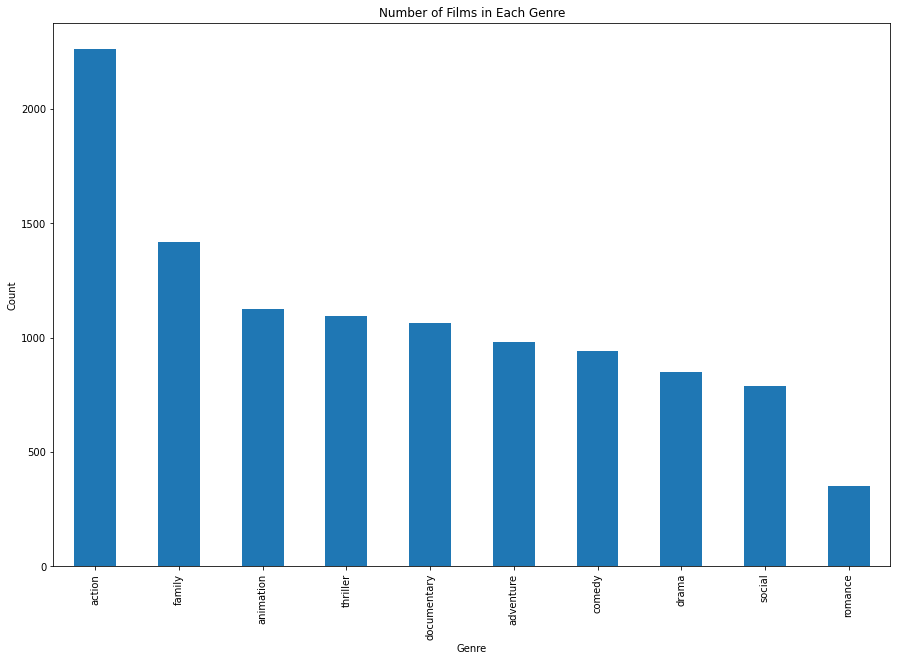

In [202]:
ax = dataframe['genre'].value_counts().plot(kind = 'bar', figsize = (15, 10), title = "Number of Films in Each Genre");
ax.set_xlabel("Genre")
ax.set_ylabel("Count")

It is obvious that 13 and 17 are more common age restrictions than the others

Text(0, 0.5, 'Count')

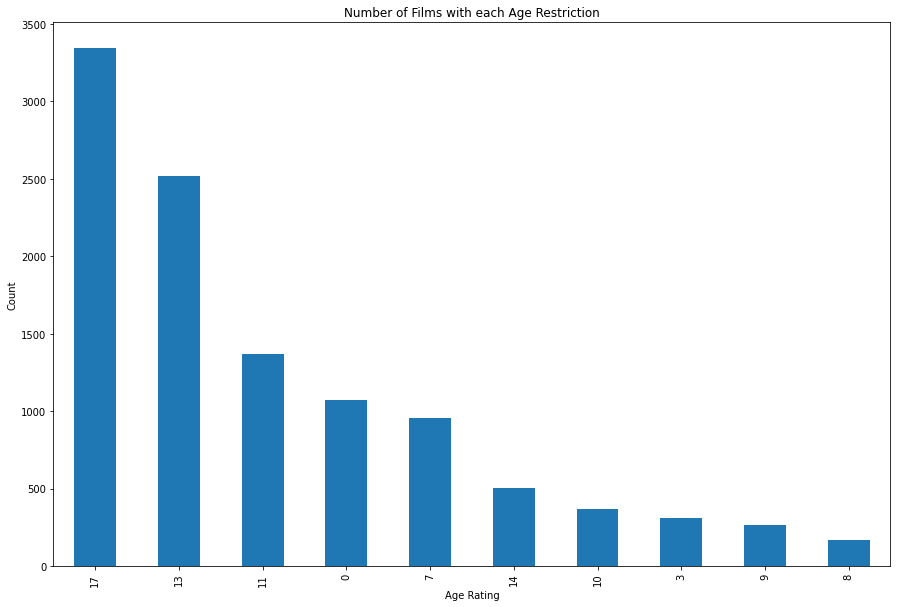

In [203]:
ax = dataframe['age_rating'].value_counts().plot(kind = 'bar', figsize = (15, 10), title = "Number of Films with each Age Restriction");
ax.set_xlabel("Age Rating")
ax.set_ylabel("Count")

Unforunately this part of dataset is not clean at all and we can see that many values are the same but because of mistypes this problem has emerged.

Text(0, 0.5, 'Count')

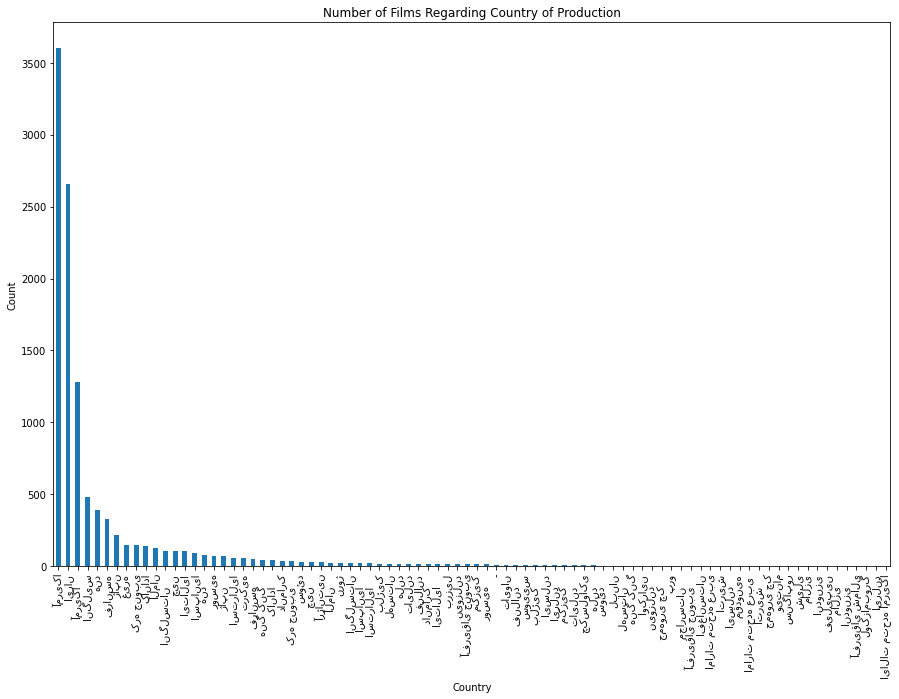

In [204]:
ax = dataframe['country_fa'].value_counts().plot(kind = 'bar', figsize = (15, 10),  title = "Number of Films Regarding Country of Production");
ax.set_xlabel("Country")
ax.set_ylabel("Count")

In the next part, I drew barplots of number of films of echa genre in a specific year. It can be interpreted that there is not much of a difference available in this column since these histograms look similar in each year so we decided that production year is not a helpful feature for us.

Year : 2000


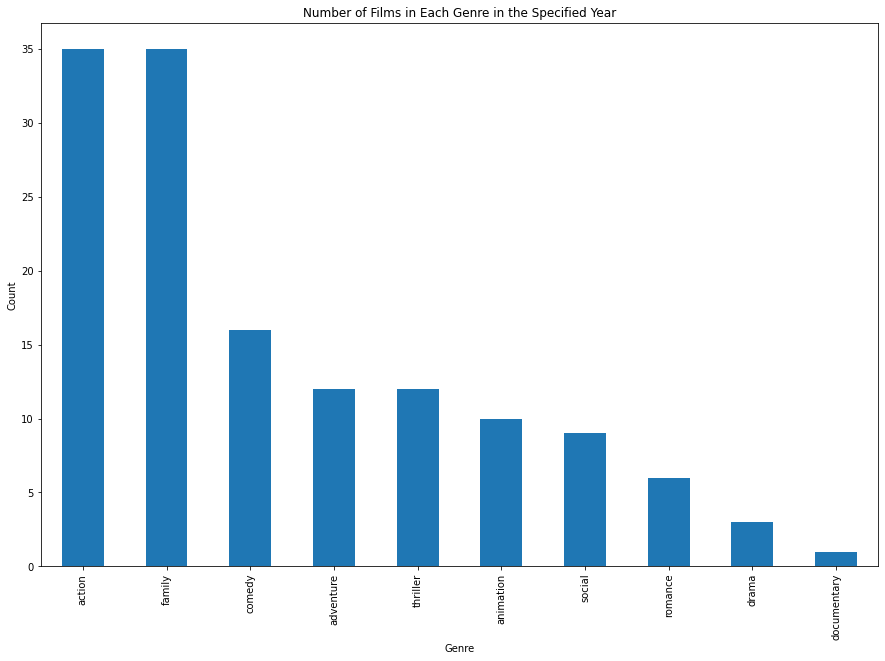

Year : 2001


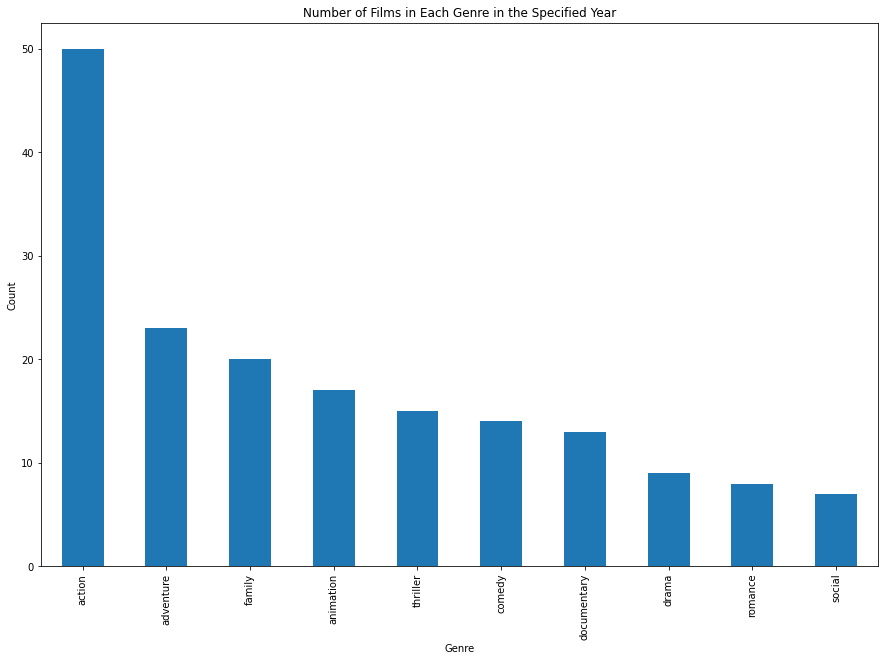

Year : 2002


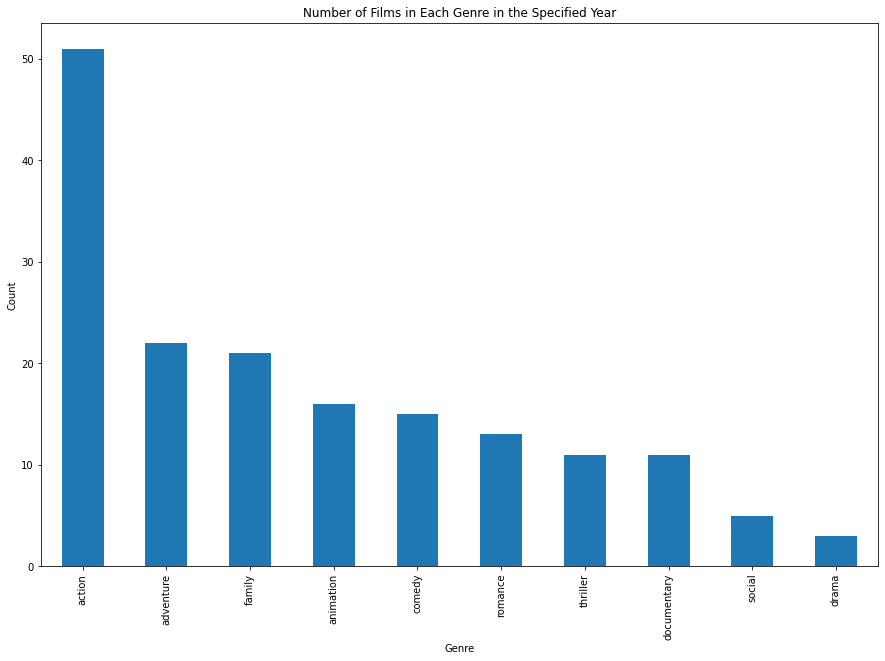

Year : 2003


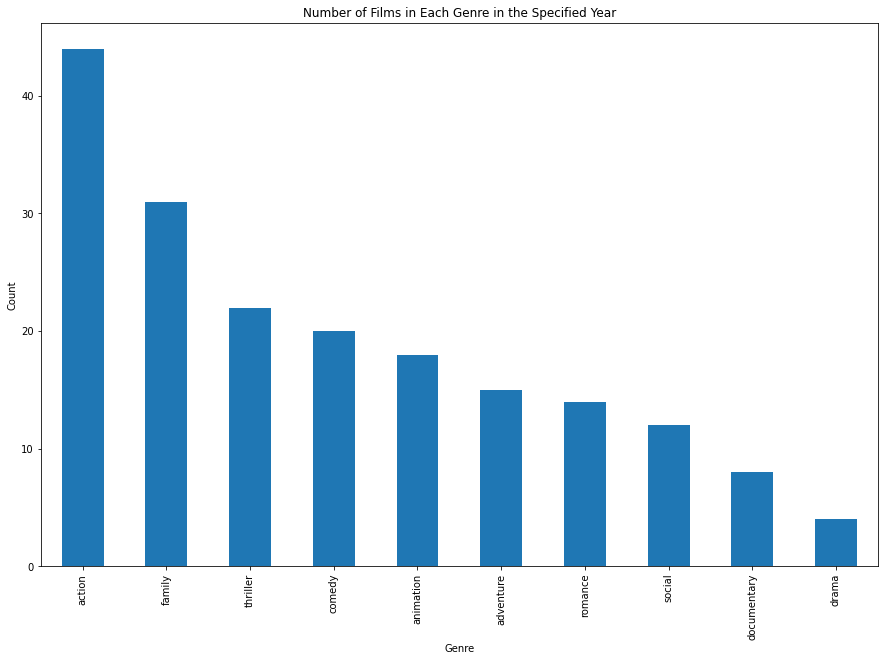

Year : 2004


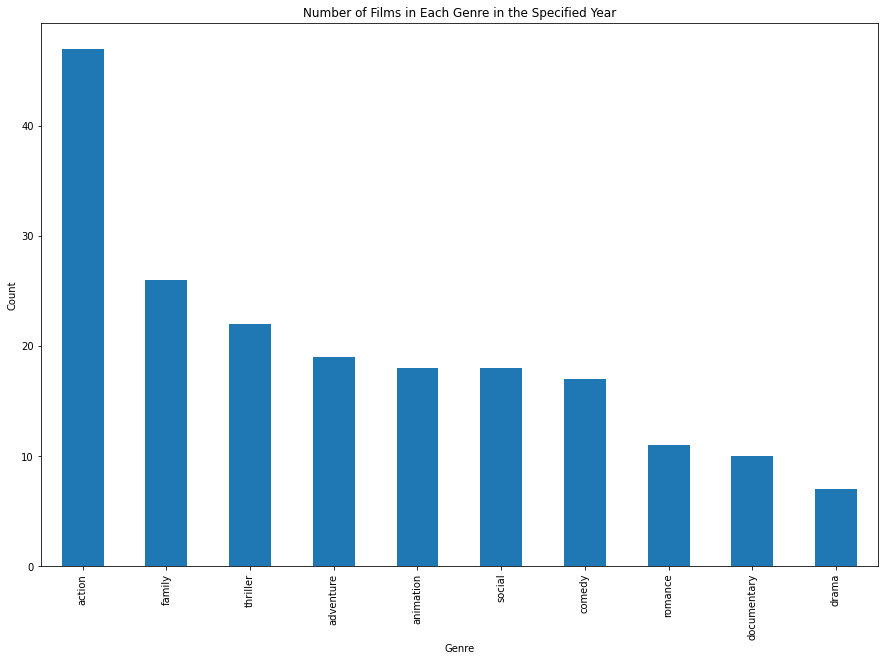

Year : 2005


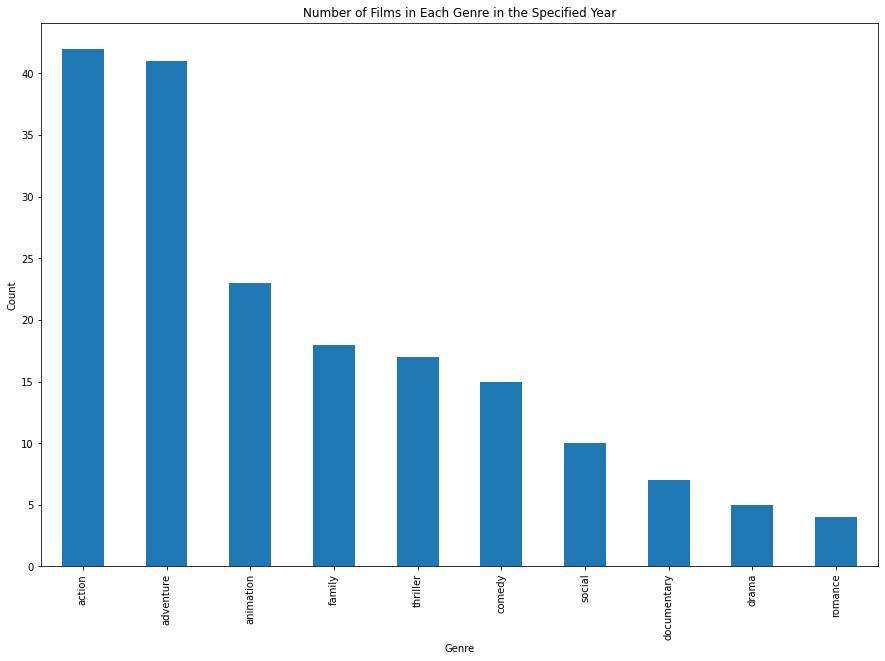

Year : 2006


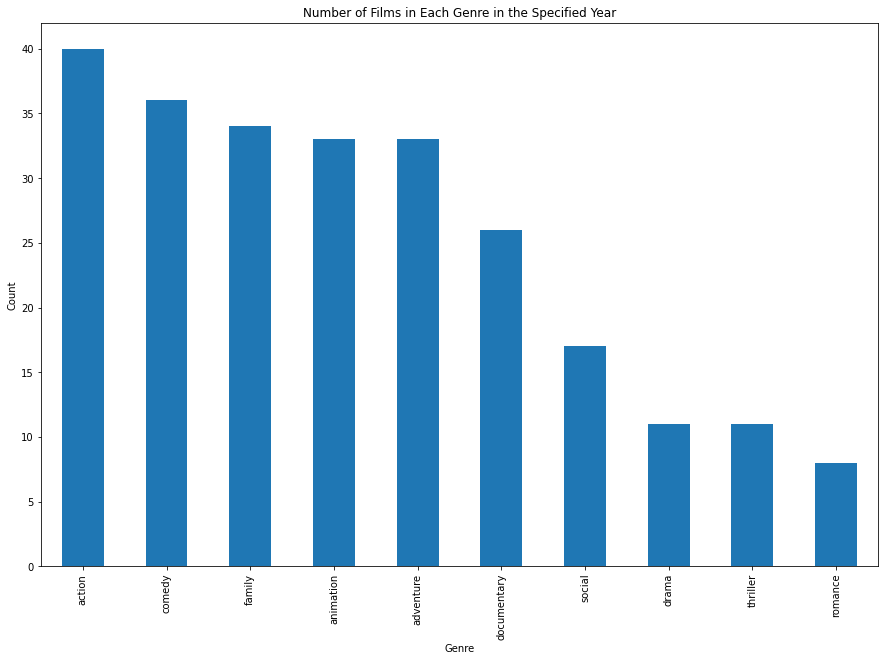

Year : 2007


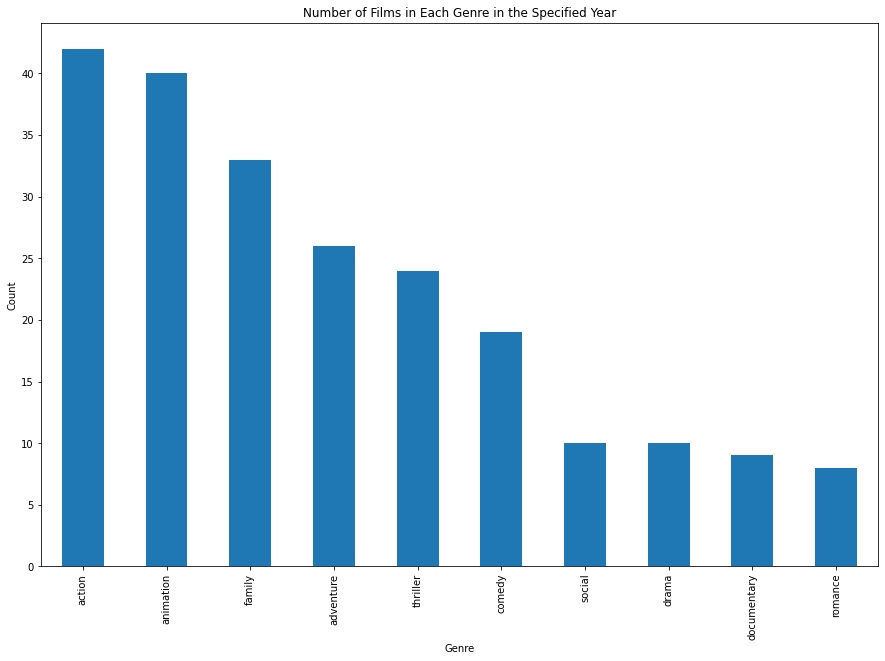

Year : 2008


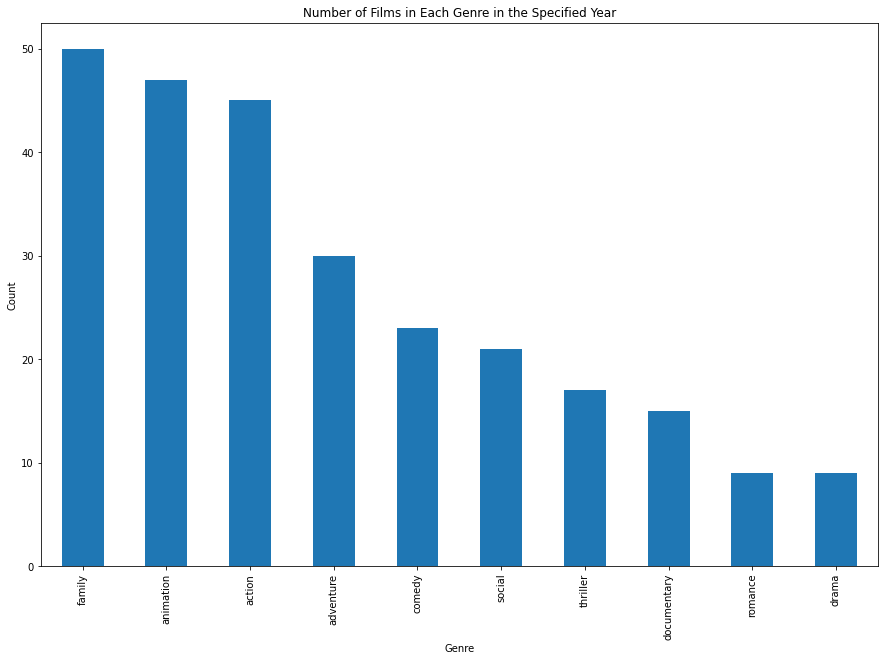

Year : 2009


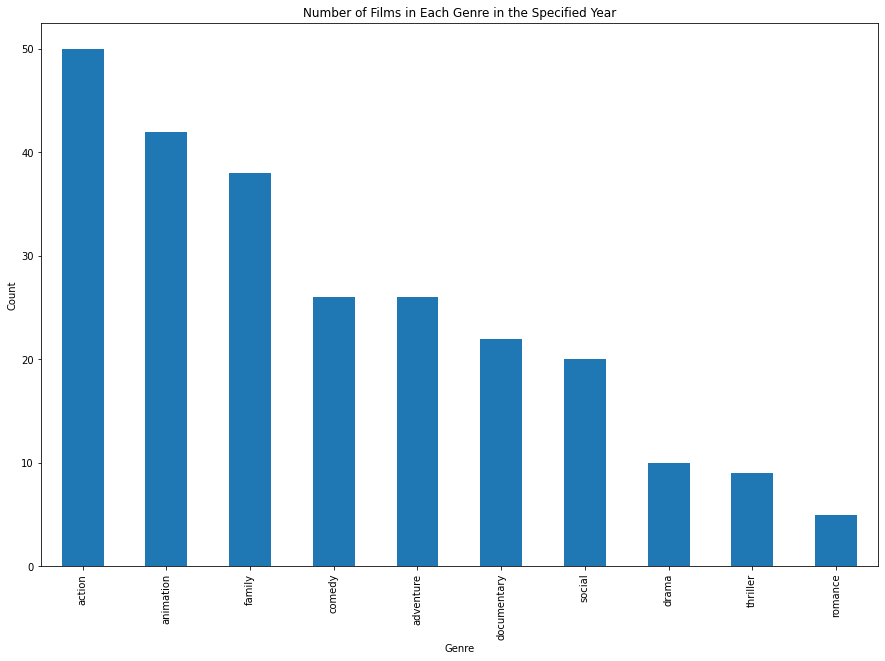

Year : 2010


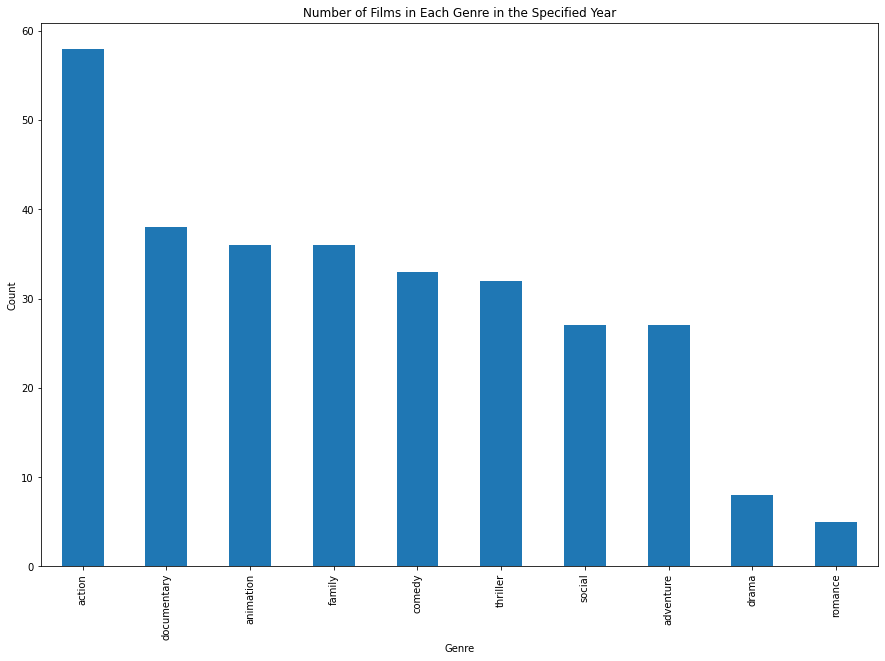

Year : 2011


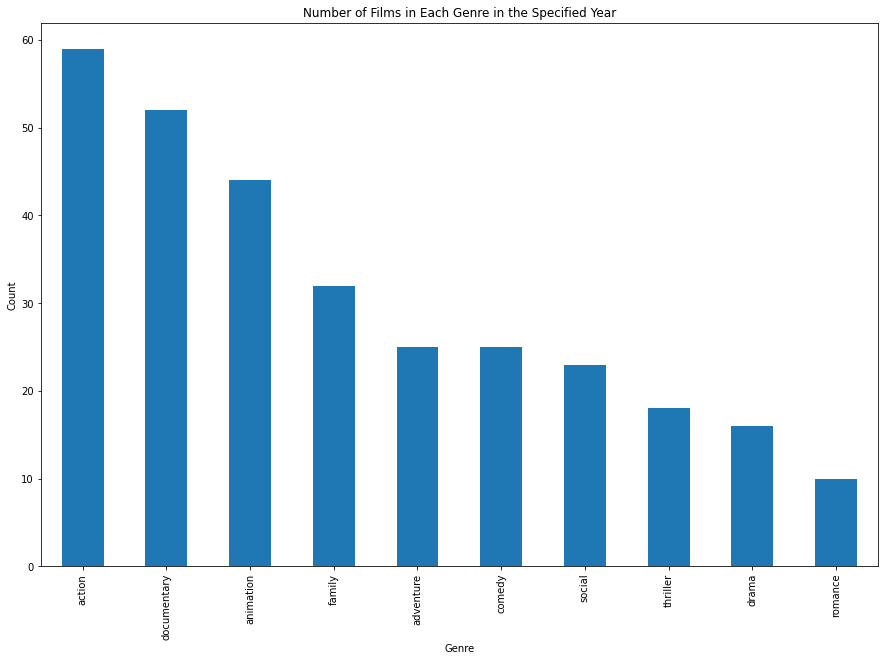

Year : 2012


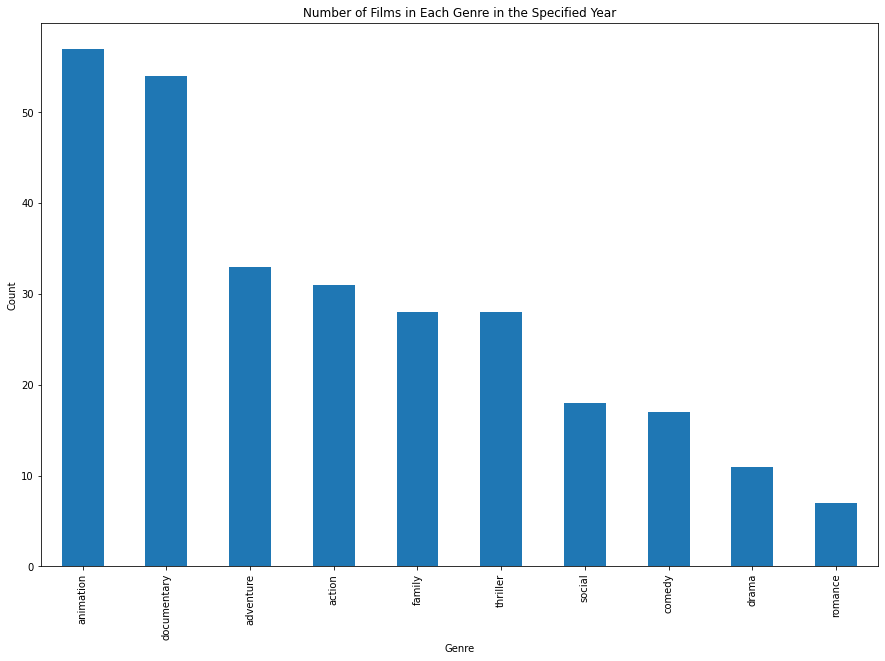

Year : 2013


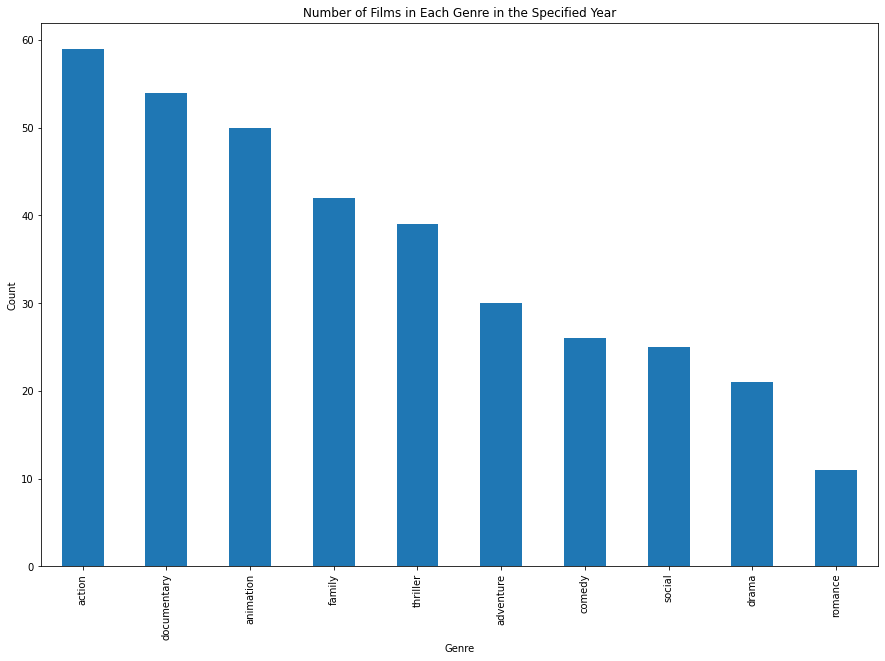

Year : 2014


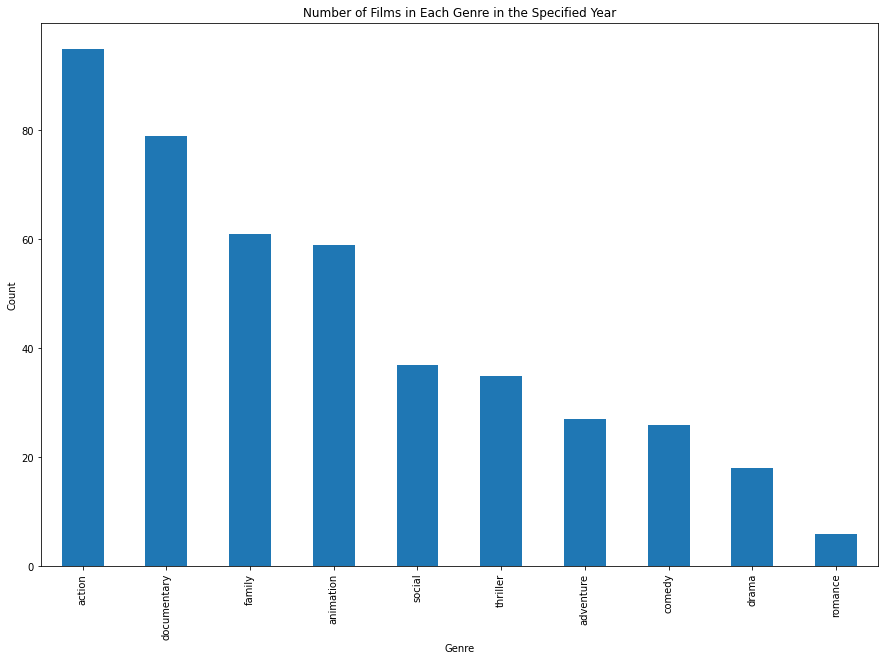

Year : 2015


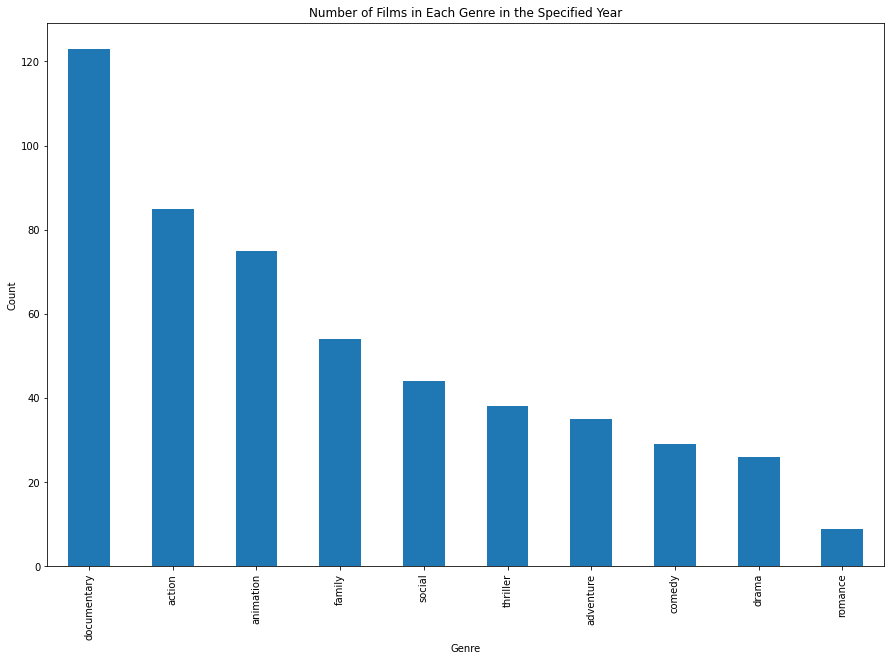

Year : 2016


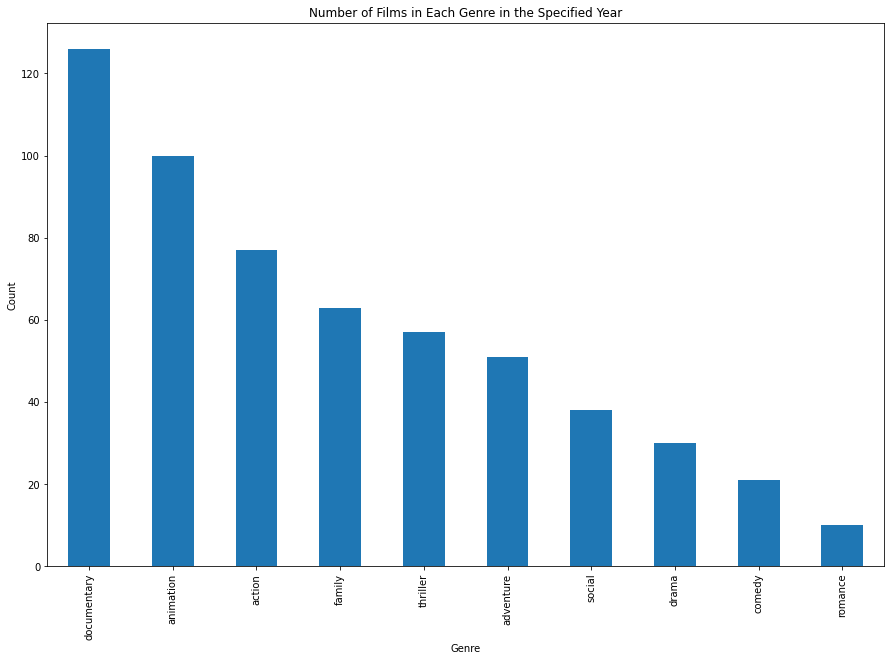

Year : 2017


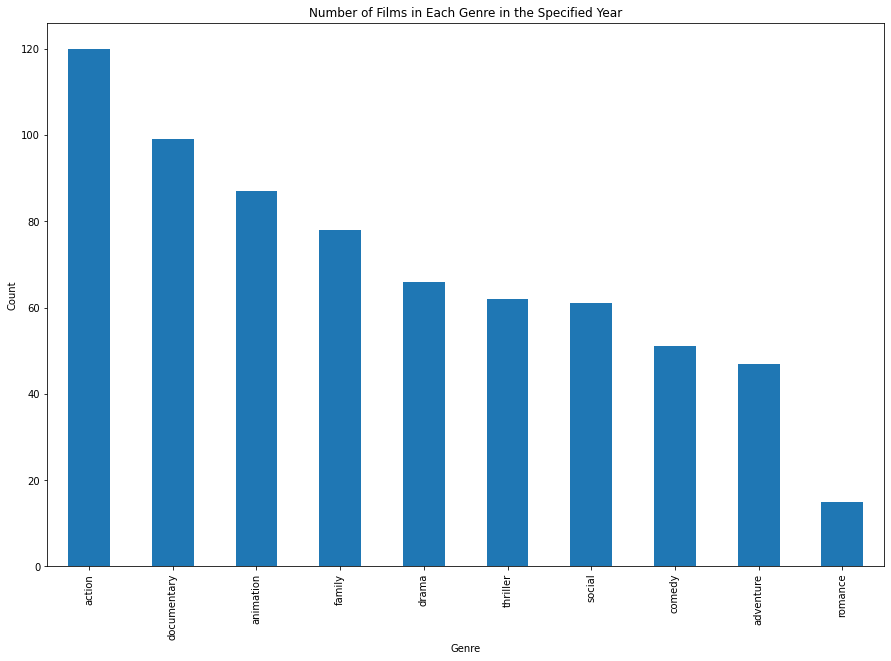

Year : 2018


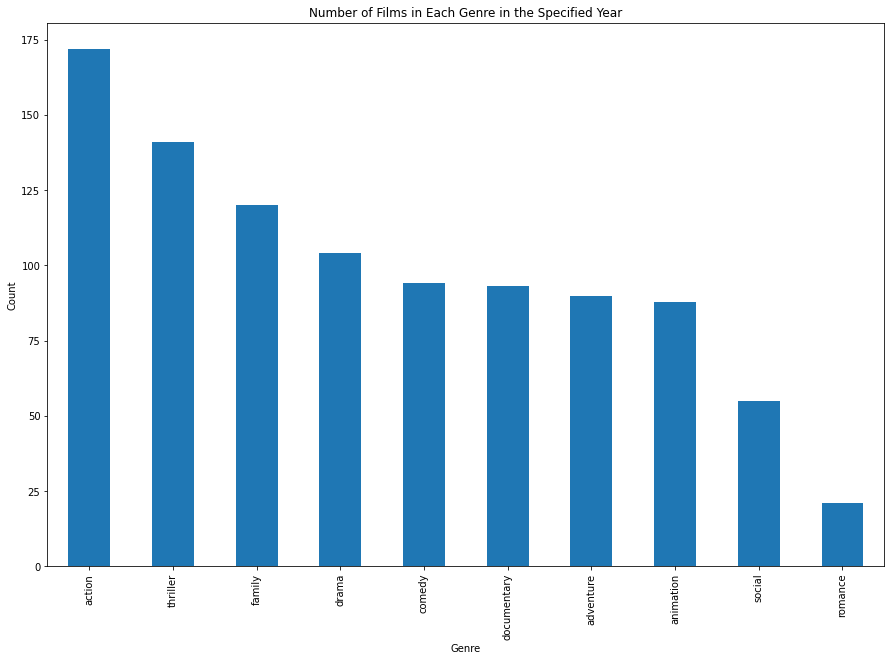

Year : 2019


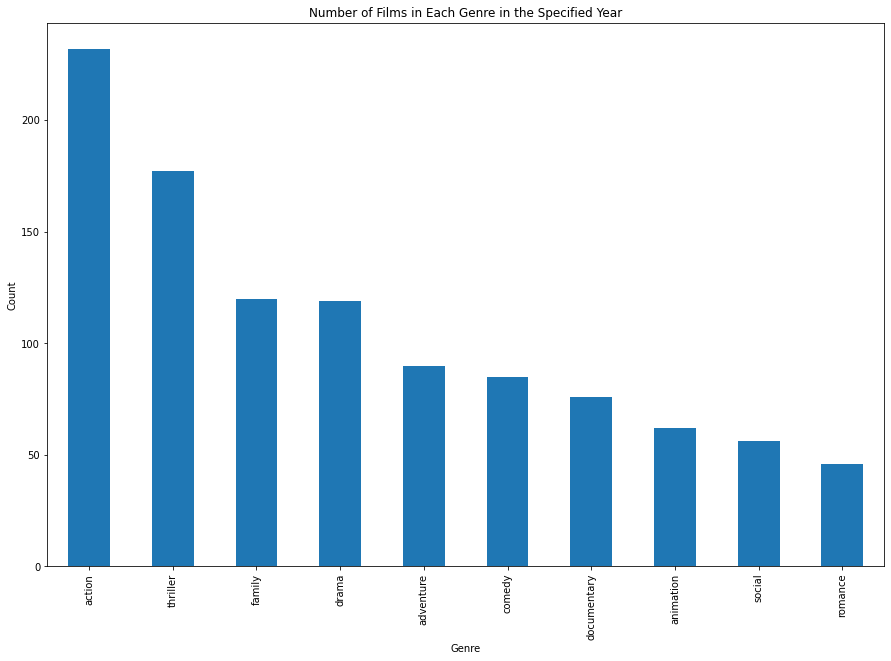

Year : 2020


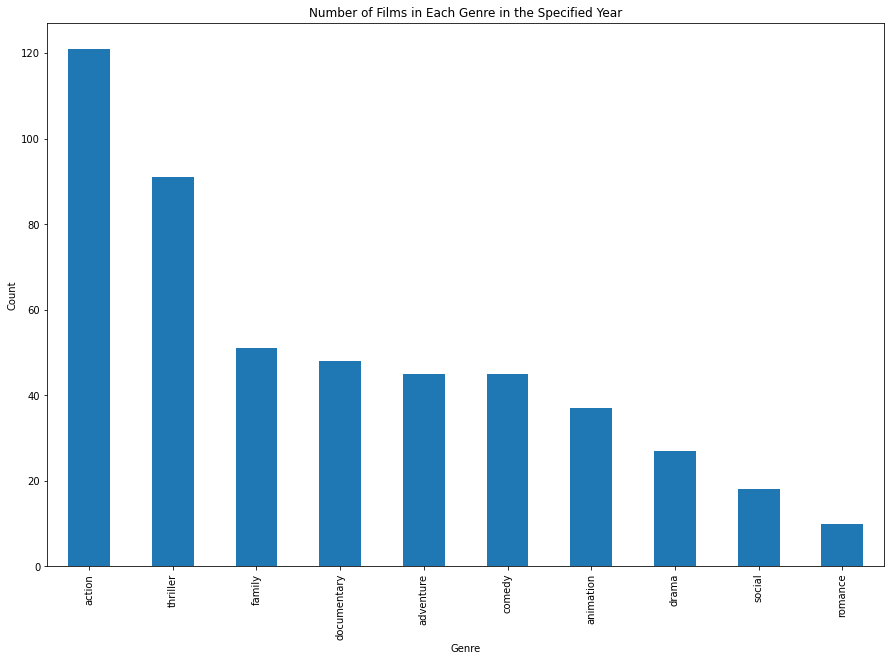

In [205]:
for i in range(2000, 2021):
  print("Year :", i)
  ax = dataframe.loc[dataframe['production_year'] == i]['genre'].value_counts().plot(kind = 'bar', figsize = (15, 10), title = "Number of Films in Each Genre in the Specified Year");
  ax.set_xlabel("Genre")
  ax.set_ylabel("Count")
  plt.show()

In [206]:
dataframe = dataframe.drop(columns = ['production_year'])

In [207]:
dataframe.head(10)

,title_fa,description_fa,age_rating,country_fa,genre,image,minute
0,نیش,همسر و فرزند خردسال یك سروان نیروی انتظامی، كه...,0,ایران,action,videos_covers_066f34bc-aaeb-4c74-a78c-83f0250c...,87
1,سرگذشت حقیقی دار و دسته کلی,درباره فیلم سرگذشت حقیقی دار و دسته کلی فیلم ...,11,انگلستان,drama,videos_covers_c36937ab-5b60-44f0-8152-01bc6ae6...,106
2,شاه آرتور - افسانه شمشیر,آرتور، مرد جوانی است که در دوران کودکی دزدیده ...,0,آمریکا,action,videos_covers_128fef8c-2a5a-417e-9061-7d06864f...,124
3,تارزان و جین,انیمیشن تارزان و جین به ماجرای تارزان و آشنایی...,7,آمریکا,adventure,videos_covers_f0b8492b-5e94-4cc4-9bec-dcf93e08...,86
4,چرخ عمر,مستند چرخ عمر داستانی در مورد یک دوچرخه کوهستا...,13,کانادا,documentary,videos_covers_965f947c-ee7d-4851-9fa5-ba303524...,46
5,پترسون,NaN,13,آمریکا,romance,videos_covers_11538b88-6747-4a73-8899-bc96b48c...,108
6,کلانتری غیر انتفاعی,فیلم درباره یک کلانتری غیر انتفاعی است که وظیف...,13,ایران,family,videos_covers_6e6bd900-87a9-4efa-8b6d-726f61ef...,93
7,شنگول و منگول,یك خانم معلم در یك گردش تفریحی داستان شنگول و ...,3,ایران,family,videos_covers_ba4ab7b7-fefb-4aa6-8c81-7dbfece2...,77
8,بچه رییس,NaN,9,آمریکا,adventure,videos_covers_c71083b2-e351-4886-8ec9-6457ae0d...,98
9,عشق و گلوله ها,یک پلیس آریزونا به سوییس فرستاده می شود تا نام...,13,آمریکا,action,videos_covers_c5f09d40-1077-4757-87ac-8995bfb4...,96


Now we vectorize country of production using one hot encoding. The class labels are categorical in nature and have to be converted into numerical form before classification is performed. One-hot encoding is adopted, which converts categorical labels into a vector of binary values. In this method you put a column for each possible value for feature and the value of that column is 1 if that feature is equal to the column's value and zero if not. In this dataset country has 80 values so one hot encoding is a suitable option.

In [208]:
dataframe = pd.concat([dataframe, pd.get_dummies(dataframe['country_fa'], prefix = 'country')], axis = 1)
dataaa = dataframe
dataframe = dataframe.drop(columns = ['country_fa'])

In [209]:
dataframe.head(10)

,title_fa,description_fa,age_rating,genre,image,minute,country_-,country_آرژانتین,country_آفریقای جنوبی,country_آفریقای جنوبی,country_آفریقای شمالی,country_آلمان,country_آلمان,country_آمریکا,country_آمریکا,country_اتریش,country_اتریش,country_استرالیا,country_استرالیا,country_اسپانیا,country_اسپانیا,country_افغانستان,country_امارات متحده عربی,country_امارات متحده عربی,country_اندونزی,country_اندونزی,country_انگلستان,country_انگلستان,country_انگلیس,country_اوکراین,country_ایالات متحده آمریکا,country_ایتالیا,country_ایتالیا,country_ایران,country_ایرلند,country_ایرلند,country_ایسلند,country_ایسلند,country_برزیل,country_بلژیک,...,country_سوئد,country_سوئد,country_سوییس,country_شیلی,country_غیره,country_فرانسه,country_فرانسه,country_فنلاند,country_فنلاند,country_فیلیپین,country_لبنان,country_لهستان,country_لهستان,country_لوکزامبورگ,country_مالزی,country_مالزی,country_مجارستان,country_مقدونیه,country_مکزیک,country_مکزیک,country_نروژ,country_نیوزلند,country_نیوزلند,country_هلند,country_هلند,country_هند,country_هند,country_هنگ کنگ,country_هنگ کنگ,country_ویتنام,country_پرو,country_چکسلواکی,country_چین,country_چین,country_ژاپن,country_ژاپن,country_کانادا,country_کانادا,country_کره جنوبی,country_کره جنوبی
0,نیش,همسر و فرزند خردسال یك سروان نیروی انتظامی، كه...,0,action,videos_covers_066f34bc-aaeb-4c74-a78c-83f0250c...,87,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,سرگذشت حقیقی دار و دسته کلی,درباره فیلم سرگذشت حقیقی دار و دسته کلی فیلم ...,11,drama,videos_covers_c36937ab-5b60-44f0-8152-01bc6ae6...,106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,شاه آرتور - افسانه شمشیر,آرتور، مرد جوانی است که در دوران کودکی دزدیده ...,0,action,videos_covers_128fef8c-2a5a-417e-9061-7d06864f...,124,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,تارزان و جین,انیمیشن تارزان و جین به ماجرای تارزان و آشنایی...,7,adventure,videos_covers_f0b8492b-5e94-4cc4-9bec-dcf93e08...,86,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,چرخ عمر,مستند چرخ عمر داستانی در مورد یک دوچرخه کوهستا...,13,documentary,videos_covers_965f947c-ee7d-4851-9fa5-ba303524...,46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,پترسون,NaN,13,romance,videos_covers_11538b88-6747-4a73-8899-bc96b48c...,108,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,کلانتری غیر انتفاعی,فیلم درباره یک کلانتری غیر انتفاعی است که وظیف...,13,family,videos_covers_6e6bd900-87a9-4efa-8b6d-726f61ef...,93,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,شنگول و منگول,یك خانم معلم در یك گردش تفریحی داستان شنگول و ...,3,family,videos_covers_ba4ab7b7-fefb-4aa6-8c81-7dbfece2...,77,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,بچه رییس,NaN,9,adventure,videos_covers_c71083b2-e351-4886-8ec9-6457ae0d...,98,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,عشق و گلوله ها,یک پلیس آریزونا به سوییس فرستاده می شود تا نام...,13,action,videos_covers_c5f09d40-1077-4757-87ac-8995bfb4...,96,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Unfortunately there is no solution for handling missing values in description column so we leave untouched. The final step of preprocessing is to process 2 remaining unchanged columns,Title and description, and extrct feature vector from them:
These columns contain some persian texts and they also have some few english words and characters so by using hazm and nltk libraries we cleaned them. The actions taken were normalization, tokenizing and lemmatizing which is a more thorough and accurate method than stemming. Lemmatisation in linguistics is the process of grouping together the inflected forms of a word so they can be analysed as a single item, identified by the word's lemma, or dictionary form. I also created my own set of stopwords regarding dataset.

In [210]:
def preprocessTextofColumn(columnName):
    normalizer = hazm.Normalizer()
    tokenizer = hazm.WordTokenizer()
    lemmatizer = hazm.Lemmatizer()
    ENGStopWords = set(stopwords.words('english'))
    PERStopWords = set(hazm.utils.stopwords_list())
    PERStopWords = PERStopWords.union({':','ی','ای',',','،','(',')',':',';','-','_','.','/','+','=','?'})
    stopWords = ENGStopWords.union(PERStopWords)
    allWords = []
    for index, row in dataframe.iterrows():
        text = row['title_fa'] + ' ' + row[columnName]
        normalizedText = normalizer.affix_spacing(text)
        words = tokenizer.tokenize(normalizedText)
        filteredWords = []
        for word in words:
            if not word in stopWords:
                filteredWords.append(lemmatizer.lemmatize(word.lower()))
        allWords.append(filteredWords)
    newColumnName = 'Words'
    dataframe[newColumnName] = allWords
    return dataframe

dataframe['description_fa'] = dataframe['description_fa'].astype(str)
dataframe['title_fa'] = dataframe['title_fa'].astype(str)

In [211]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [212]:
dataframe = preprocessTextofColumn('description_fa')

In [213]:
dataframe = dataframe.drop(columns = ['description_fa', 'title_fa'])

In [214]:
dataframe.head()

,age_rating,genre,image,minute,country_-,country_آرژانتین,country_آفریقای جنوبی,country_آفریقای جنوبی,country_آفریقای شمالی,country_آلمان,country_آلمان,country_آمریکا,country_آمریکا,country_اتریش,country_اتریش,country_استرالیا,country_استرالیا,country_اسپانیا,country_اسپانیا,country_افغانستان,country_امارات متحده عربی,country_امارات متحده عربی,country_اندونزی,country_اندونزی,country_انگلستان,country_انگلستان,country_انگلیس,country_اوکراین,country_ایالات متحده آمریکا,country_ایتالیا,country_ایتالیا,country_ایران,country_ایرلند,country_ایرلند,country_ایسلند,country_ایسلند,country_برزیل,country_بلژیک,country_بلژیک,country_تایلند,...,country_سوئد,country_سوییس,country_شیلی,country_غیره,country_فرانسه,country_فرانسه,country_فنلاند,country_فنلاند,country_فیلیپین,country_لبنان,country_لهستان,country_لهستان,country_لوکزامبورگ,country_مالزی,country_مالزی,country_مجارستان,country_مقدونیه,country_مکزیک,country_مکزیک,country_نروژ,country_نیوزلند,country_نیوزلند,country_هلند,country_هلند,country_هند,country_هند,country_هنگ کنگ,country_هنگ کنگ,country_ویتنام,country_پرو,country_چکسلواکی,country_چین,country_چین,country_ژاپن,country_ژاپن,country_کانادا,country_کانادا,country_کره جنوبی,country_کره جنوبی,Words
0,0,action,videos_covers_066f34bc-aaeb-4c74-a78c-83f0250c...,87,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[نیش, همسر, فرزند, خردسال, یك, سروان, نیرو, ان..."
1,11,drama,videos_covers_c36937ab-5b60-44f0-8152-01bc6ae6...,106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[سرگذشت, حقیقی, فیلم سرگذشت, حقیقی, فیلم, سرگذ..."
2,0,action,videos_covers_128fef8c-2a5a-417e-9061-7d06864f...,124,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[شاه, آرتور, افسانه, شمشیر, آرتور, مرد, جوان, ..."
3,7,adventure,videos_covers_f0b8492b-5e94-4cc4-9bec-dcf93e08...,86,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[تارزان, جین, انیمیشن, تارزان, جین, ماجرا, تار..."
4,13,documentary,videos_covers_965f947c-ee7d-4851-9fa5-ba303524...,46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,"[چرخ, عمر, مستند, چرخ, عمر, داستان, دوچرخه, کو..."


Now we split the dataset into train and test using sklearn's command train_test_split. It is splited into 80% train and 20% test.

In [215]:
dataframe2 = dataframe

In [216]:
X = dataframe.drop(columns = ['genre'])
y = dataframe['genre']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)
print('Train size: {}, Test size: {}' .format(X_train.shape, X_test.shape))

Train size: (8704, 90), Test size: (2176, 90)


The final thing before learning is to convert these list of words , that came from title and description, into features. I used one hot encoding here but there would be over 15000 features if I had used all words so we count number of occurance for each word and keep only 2500 words which were more frequent. Also because the title did not contain much data to be respected as an independent feature we aggregated it with the description and made one text for processing.

In [217]:
descCounts = {}
descDictionary = {}
for index, row in X_train.iterrows():
    for word in row['Words']:
        if word not in descCounts:
            descCounts[word] = 1
        else:
            descCounts[word] += 1 
descDictionary = {k: v for k, v in sorted(descCounts.items(), key = lambda item: item[1], reverse = True)}

In [218]:
print(len(descDictionary))
print(descDictionary)

21909
{'فیلم': 4268, 'داستان': 2349, 'nan': 1954, 'سال': 1877, 'زندگی': 1768, '»': 1683, '«': 1677, 'نام': 1381, 'کارگردان': 980, 'شهر': 850, 'دختر': 821, 'محصول': 793, '"': 763, 'کار': 747, 'پسر': 742, 'مستند': 737, 'جوان': 714, 'خانواده': 687, 'دست': 681, 'کشور': 646, 'همراه': 635, 'پدر': 633, 'توسط': 633, 'قرار': 620, 'خانه': 616, 'پرداخت#پرداز': 598, 'بازی': 570, 'روز': 567, 'انیمیشن': 510, 'میکند': 507, 'پلیس': 496, 'سریال': 494, 'تصمیم': 487, 'جنگ': 469, 'سفر': 468, 'دوست': 468, 'ایران': 463, 'مرد': 458, 'دنیا': 457, 'همسر': 451, 'نقش': 441, 'روایت': 432, 'گرفت#گیر': 426, 'توانست#توان': 419, 'ساخت#ساز': 419, 'ژانر': 412, 'مادر': 412, 'دنبال': 408, 'آمریکا': 395, 'قسمت': 394, 'ساخته': 387, 'تلاش': 386, 'ماجرا': 385, 'زن': 384, 'میشود': 382, 'و…': 382, 'عنوان': 375, 'بچه': 374, 'زمان': 370, 'قتل': 362, 'کمک': 356, 'زندان': 350, 'گروه': 346, 'مرگ': 345, 'مردی': 338, 'رفت#رو': 331, 'نویسندگی': 318, '۲': 317, 'جان': 314, 'اتفاق': 313, 'فرار': 311, 'برادر': 309, 'جشنواره': 308, 'دوستان

In [219]:
descDictionary = dict(itertools.islice(descDictionary.items(), 2500))

Now, we applied a bag of words method in order to extract trainable features from texts. In this method, we had a column for each frequent word and for each row put 1 in the columns that their word was available in that row's description.

In [220]:
for key in descDictionary:
    X_train['desc_' + key] = 0
    X_train['desc_' + key] = X_train['Words'].apply(lambda x : 1 if key in x else 0)
    X_test['desc_' + key] = 0
    X_test['desc_' + key] = X_test['Words'].apply(lambda x : 1 if key in x else 0)
X_train = X_train.drop(columns = ['Words'])
X_test = X_test.drop(columns = ['Words'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [221]:
X_train.head(10)

,age_rating,image,minute,country_-,country_آرژانتین,country_آفریقای جنوبی,country_آفریقای جنوبی,country_آفریقای شمالی,country_آلمان,country_آلمان,country_آمریکا,country_آمریکا,country_اتریش,country_اتریش,country_استرالیا,country_استرالیا,country_اسپانیا,country_اسپانیا,country_افغانستان,country_امارات متحده عربی,country_امارات متحده عربی,country_اندونزی,country_اندونزی,country_انگلستان,country_انگلستان,country_انگلیس,country_اوکراین,country_ایالات متحده آمریکا,country_ایتالیا,country_ایتالیا,country_ایران,country_ایرلند,country_ایرلند,country_ایسلند,country_ایسلند,country_برزیل,country_بلژیک,country_بلژیک,country_تایلند,country_تایلند,...,desc_موسسه,desc_پرداخته,desc_پرستو,desc_انتقاد,desc_سهراب,desc_خونه,desc_محوریت,desc_هسته‌ای,desc_دنیرو,desc_درآمده,desc_براون,desc_نوزدهم,desc_آنابل,desc_ثانیه,desc_زباله,desc_خرمشهر,desc_ماسک,desc_پیشتاز,desc_زورو,desc_درخشش,desc_عاشورا,desc_ویک,desc_گمان,desc_مسخره,desc_ششم,desc_ساموئل,desc_17.0,desc_آستریکس,desc_غلامرضا,desc_کوروساوا,desc_۲۰۰,desc_ممنوع,desc_داور,desc_نشدن,desc_کیان,desc_سوارکار,desc_اتمام,desc_مراحل,desc_الکساندریا,desc_میگردند
3485,11,videos_covers_beabb378-34a2-4fef-9f6a-bf48fe58...,86,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3098,14,videos_covers_53523ede-c74b-4442-8ab6-71db60a6...,43,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1160,0,videos_covers_f7ee9d41-c676-47d5-9d86-cbb931b3...,95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7104,11,videos_covers_dcb382cb-ef11-4a5c-8165-cfc53ff6...,88,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7187,7,videos_covers_eb5e9b9e-8a7f-470e-82f4-b324e866...,72,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6738,0,videos_covers_e99aeff1-9085-45b9-a479-1d48c447...,12,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8220,17,videos_covers_2e456977-34ae-4e43-98b0-c8263da0...,107,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9689,17,videos_covers_8b078082-e3e8-411f-9253-acd9a7eb...,51,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2068,17,videos_covers_ebb9cacc-9257-4702-a501-d2a57cae...,86,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8614,0,videos_covers_7760a5f8-7c3f-4669-a7e3-d408cb7d...,178,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [222]:
X_test.head(10)

,age_rating,image,minute,country_-,country_آرژانتین,country_آفریقای جنوبی,country_آفریقای جنوبی,country_آفریقای شمالی,country_آلمان,country_آلمان,country_آمریکا,country_آمریکا,country_اتریش,country_اتریش,country_استرالیا,country_استرالیا,country_اسپانیا,country_اسپانیا,country_افغانستان,country_امارات متحده عربی,country_امارات متحده عربی,country_اندونزی,country_اندونزی,country_انگلستان,country_انگلستان,country_انگلیس,country_اوکراین,country_ایالات متحده آمریکا,country_ایتالیا,country_ایتالیا,country_ایران,country_ایرلند,country_ایرلند,country_ایسلند,country_ایسلند,country_برزیل,country_بلژیک,country_بلژیک,country_تایلند,country_تایلند,...,desc_موسسه,desc_پرداخته,desc_پرستو,desc_انتقاد,desc_سهراب,desc_خونه,desc_محوریت,desc_هسته‌ای,desc_دنیرو,desc_درآمده,desc_براون,desc_نوزدهم,desc_آنابل,desc_ثانیه,desc_زباله,desc_خرمشهر,desc_ماسک,desc_پیشتاز,desc_زورو,desc_درخشش,desc_عاشورا,desc_ویک,desc_گمان,desc_مسخره,desc_ششم,desc_ساموئل,desc_17.0,desc_آستریکس,desc_غلامرضا,desc_کوروساوا,desc_۲۰۰,desc_ممنوع,desc_داور,desc_نشدن,desc_کیان,desc_سوارکار,desc_اتمام,desc_مراحل,desc_الکساندریا,desc_میگردند
5991,10,videos_covers_5e25a51e-099e-4159-a4ff-4faf79f6...,29,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5586,7,videos_covers_cbd7e1ed-3f52-4ac3-925a-52f73bdb...,95,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5823,14,videos_covers_37cf1605-184d-41eb-b49c-36cffe46...,47,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2207,11,videos_covers_33a5e7fe-fbd3-4e12-b721-ebafa9f1...,80,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8546,17,videos_covers_07cc8ea3-e49a-472b-b01c-ff0f9e58...,75,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2561,10,videos_covers_72d3bf8e-c012-484e-9e68-f4b4bb56...,86,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
858,7,videos_covers_f0c8f682-1355-4d9c-ac64-20f7302f...,128,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3242,13,videos_covers_fbaab023-87e0-4f6a-a2b4-31be1c3b...,124,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6623,17,videos_covers_537475e6-11da-4338-8da6-3cc648b7...,82,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3776,13,videos_covers_536c5ae6-b6b7-42c2-b5f0-9f6033c4...,79,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# **Logistic Regression Classifier**
In this section we try to train a model on the text features extracted and skip using images. The first algorithm used is logistig regression which reaches to 48% accuracy. Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable.

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import f1_score

In [48]:
lr = LogisticRegression()
clf = OneVsRestClassifier(lr)
X_train2 = X_train
y_train2 = y_train
X_test2 = X_test
y_test2 = y_test

In [49]:
X_train2 = X_train2.drop(columns = ['image'])
X_test2 = X_test2.drop(columns = ['image'])

In [50]:
clf.fit(X_train2, y_train2)
y_pred = clf.predict(X_test2)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test2, y_pred)

0.4880514705882353

# **Random Forest Classifier**

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. We reache near 59% accuracy with random forest.

In [52]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import AdaBoostClassifier as AdaBoost
rfc_mdl = RFC(n_estimators=50, max_depth=25, class_weight ='balanced', n_jobs=-1).fit(X_train2, y_train2)
rf_pred = rfc_mdl.predict(X_test2)

In [ ]:
from sklearn.metrics import hamming_loss
hl = hamming_loss(y_test2, rf_pred)
accuracy_score(y_test2, rf_pred)

0.4912683823529412

# **ADABoost Classifier**

An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases. We changed the parameters of AdaBoostClassifier function such as max_depth of our tree , n_estimators and learning_rate, and the best accuracy emerges when max_depth=12, n_estimators=50, algorithm="SAMME", learning_rate=0.5.

SMME algorithm is slower than SAMME.R algorithm(which is the default one), but it brings about higher accuracy in the final result.

In [250]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
ada_clf = OneVsRestClassifier(AdaBoostClassifier(DecisionTreeClassifier(max_depth=9), n_estimators=50, algorithm="SAMME", learning_rate=0.5))
ada_clf.fit(X_train2, y_train2)
ada_clf_pred = ada_clf.predict(X_test2)
accuracy_score(y_test2, ada_clf_pred)

0.6066176470588235

In [ ]:
ada_clf = OneVsRestClassifier(AdaBoostClassifier(DecisionTreeClassifier(max_depth=9), n_estimators=100, algorithm="SAMME", learning_rate=0.5))
ada_clf.fit(X_train2, y_train2)
ada_clf_pred = ada_clf.predict(X_test2)
accuracy_score(y_test2, ada_clf_pred)

0.6056985294117647

In [ ]:
ada_clf = OneVsRestClassifier(AdaBoostClassifier(DecisionTreeClassifier(max_depth=9), n_estimators=50, algorithm="SAMME", learning_rate=0.8))
ada_clf.fit(X_train2, y_train2)
ada_clf_pred = ada_clf.predict(X_test2)
accuracy_score(y_test2, ada_clf_pred)

0.5896139705882353

In [258]:
ada_clf2 = OneVsRestClassifier(AdaBoostClassifier(DecisionTreeClassifier(max_depth=12), n_estimators=50, algorithm="SAMME", learning_rate=0.5))
ada_clf2.fit(X_train2, y_train2)
ada_clf_pred2 = ada_clf2.predict(X_test2) 
accuracy_score(y_test2, ada_clf_pred2)

0.6066176470588235

In [ ]:
ada_clf = OneVsRestClassifier(AdaBoostClassifier(DecisionTreeClassifier(max_depth=16), n_estimators=50, algorithm="SAMME", learning_rate=0.5))
ada_clf.fit(X_train2, y_train2)
ada_clf_pred = ada_clf.predict(X_test2) 
accuracy_score(y_test2, ada_clf_pred)

0.5863970588235294

We reached a high accuracy of hardly 61% which is a realy high number for this calssification problem for 2 reasons:
- The number of rows with missing values were a lot, about 2500 rows, so the best accuracy theoretically possible is about 75% so our accuracy is actually 81% in the data which were possible to train. Also, the baseline of this problem is about 21% accuracy which is the situation if we classify every film as action which is the most frequent genre.
- The second problem is the problems of hazm library. It is widely accepted that languauge processing tools available for persian language are less enhanced and developed ones versus the tools available for english language.

In [260]:
from sklearn.metrics import classification_report
from sklearn.metrics import balanced_accuracy_score
print(classification_report(y_test2, ada_clf_pred2))
print(balanced_accuracy_score(y_test2, ada_clf_pred2))

              precision    recall  f1-score   support

      action       0.55      0.71      0.62       435
   adventure       0.51      0.43      0.47       200
   animation       0.69      0.70      0.70       228
      comedy       0.67      0.43      0.53       200
 documentary       0.85      0.83      0.84       205
       drama       0.76      0.94      0.84       184
      family       0.46      0.47      0.46       300
     romance       0.48      0.27      0.34        74
      social       0.41      0.33      0.37       143
    thriller       0.68      0.62      0.65       207

    accuracy                           0.61      2176
   macro avg       0.60      0.57      0.58      2176
weighted avg       0.60      0.61      0.60      2176

0.5734117201127669


In [ ]:
dataframe2.head()      

,age_rating,genre,image,minute,country_-,country_آرژانتین,country_آفریقای جنوبی,country_آفریقای جنوبی,country_آفریقای شمالی,country_آلمان,country_آلمان,country_آمریکا,country_آمریکا,country_اتریش,country_اتریش,country_استرالیا,country_استرالیا,country_اسپانیا,country_اسپانیا,country_افغانستان,country_امارات متحده عربی,country_امارات متحده عربی,country_اندونزی,country_اندونزی,country_انگلستان,country_انگلستان,country_انگلیس,country_اوکراین,country_ایالات متحده آمریکا,country_ایتالیا,country_ایتالیا,country_ایران,country_ایرلند,country_ایرلند,country_ایسلند,country_ایسلند,country_برزیل,country_بلژیک,country_بلژیک,country_تایلند,...,country_سوئد,country_سوییس,country_شیلی,country_غیره,country_فرانسه,country_فرانسه,country_فنلاند,country_فنلاند,country_فیلیپین,country_لبنان,country_لهستان,country_لهستان,country_لوکزامبورگ,country_مالزی,country_مالزی,country_مجارستان,country_مقدونیه,country_مکزیک,country_مکزیک,country_نروژ,country_نیوزلند,country_نیوزلند,country_هلند,country_هلند,country_هند,country_هند,country_هنگ کنگ,country_هنگ کنگ,country_ویتنام,country_پرو,country_چکسلواکی,country_چین,country_چین,country_ژاپن,country_ژاپن,country_کانادا,country_کانادا,country_کره جنوبی,country_کره جنوبی,Words
0,0,action,videos_covers_066f34bc-aaeb-4c74-a78c-83f0250c...,87,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[نیش, همسر, فرزند, خردسال, یك, سروان, نیرو, ان..."
1,11,drama,videos_covers_c36937ab-5b60-44f0-8152-01bc6ae6...,106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[سرگذشت, حقیقی, فیلم سرگذشت, حقیقی, فیلم, سرگذ..."
2,0,action,videos_covers_128fef8c-2a5a-417e-9061-7d06864f...,124,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[شاه, آرتور, افسانه, شمشیر, آرتور, مرد, جوان, ..."
3,7,adventure,videos_covers_f0b8492b-5e94-4cc4-9bec-dcf93e08...,86,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"[تارزان, جین, انیمیشن, تارزان, جین, ماجرا, تار..."
4,13,documentary,videos_covers_965f947c-ee7d-4851-9fa5-ba303524...,46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,"[چرخ, عمر, مستند, چرخ, عمر, داستان, دوچرخه, کو..."


Now that we reached an acceptable accuracy for text-based model we divert our attention to the image database available which is the collection of posters of each movie. First of all, we mount the drive and import te images using a shortcut of the given ling in our drive. Then we unzip this rar file containing images.

In [386]:
import zipfile
from google.colab import drive
drive.mount('/content/drive/')
zip_ref = zipfile.ZipFile("/content/drive/My Drive/train_images.zip", 'r')
zip_ref.extractall("/tmp")
zip_ref.close()

Mounted at /content/drive/


(This part is here too handle the problems regarding opencv versions)

In [48]:
# !pip3 install opencv-python==3.4.2.17 opencv-contrib-python==3.4.2.17

# !pip3 uninstall opencv-contrib-python
# !pip3 uninstall opencv-python
# !pip3 install opencv-contrib-python
# !pip3 install opencv-python
# !pip uninstall imgaug && pip uninstall albumentations && pip install git+https://github.com/aleju/imgaug.git

# !pip3 uninstall opencv-contrib-python
# !pip3 uninstall opencv-python
# !pip3 install opencv-contrib-python
# !pip3 install opencv-python

# !pip install opencv-python==3.4.2.16
#! pip install opencv-contrib-python==3.4.2.16

In [49]:
import cv2 as cv
import numpy as np

We use 2 methods for image processing of posters available: SIFT and ORB
# ORB:
Oriented FAST and Rotated BRIEF (ORB) was developed at OpenCV labs in 2011, as an efficient and viable alternative to SIFT and SURF. ORB was conceived mainly because SIFT and SURF are patented algorithms. ORB, however, is free to use. ORB performs as well as SIFT on the task of feature detection (and is better than SURF) while being almost two orders of magnitude faster. ORB builds on the well-known FAST keypoint detector and the BRIEF descriptor. Both of these techniques are attractive because of their good performance and low cost. Orb algorithm uses a multiscale image pyramid. An image pyramid is a multiscale representation of a single image, that consist of sequences of images all of which are versions of the image at different resolutions. Each level in the pyramid contains the downsampled version of the image than the previous level. Once orb has created a pyramid it uses the fast algorithm to detect keypoints in the image. By detecting keypoints at each level orb is effectively locating key points at a different scale. In this way, ORB is partial scale invariant. After locating keypoints orb now assign an orientation to each keypoint like left or right facing depending on how the levels of intensity change around that keypoint.

# Sift:
Scale-Invariant Feature Transform(SIFT) was first presented in 2004. SIFT is invariance to image scale and rotation. This algorithm is patented, so this algorithm is included in the Non-free module in OpenCV(But we used it using a trick in stackoverflow :D ). Real world objects are meaningful only at a certain scale. This multi-scale nature of objects is quite common in nature and a scale space attempts to replicate this concept on digital images. Scale-space is separated into octaves and the number of octaves and scale depends on the size of the original image. So we generate several octaves of the original image. Each octave’s image size is half the previous one. Within an octave, images are progressively blurred using the Gaussian Blur operator. Now we use those blurred images to generate another set of images, the Difference of Gaussians(DoG) which are great for finding out interesting keypoints in the image. The difference of Gaussian is obtained as the difference of Gaussian blurring of an image with two different σ, let it be σ and kσ. This process is done for different octaves of the image in the Gaussian Pyramid. One pixel in an image is compared with its 8 neighbors as well as 9 pixels in the next scale and 9 pixels in previous scales. This way, a total of 26 checks are made. If it is a local extrema, it is a potential keypoint. It basically means that keypoint is best represented in that scale. The rest is like the ORB method.



We use a method in which we elicit the keypoints available in each picture then we run a k-means clustering algorithm on the list of all keypoints of all pictures and find a predefined number of centers for clusters whithin images keypoints. Then we label each component of each image with the nearest cluster center and count the number of components in each cluster for every image. Then by using zero-one columns we represent the features extracted. In other words we applied a bag of words method for images in order to use image features next to text features. This method is very accurate and can reach high accuracies about 90% but unfortunately, time complexity of this method is high too. So we  used less than 1/10 of dataset and about 2000 to 3000 clusters and e reached a high accuracy of ner 50 with this low value of data. Surely we would have reached a high accuracy if we had the required resources and the paper we used for this method acknowledges this fact.

In [50]:
import cv2
X_train2 = X_train[:800]
y_train2 = y_train[:800]
X_test2 = X_test[:200]
y_test2 = y_test[:200]
des_list = []
orb = cv2.ORB_create()
location = "/tmp/train_set/"
for index, row in X_train2.iterrows():
    im = cv2.imread(location + row['image'])
    kp = orb.detect(im, None)
    keypoints, descriptor = orb.compute(im, kp)
    des_list.append((location + row['image'], descriptor))

In [51]:
descriptors = des_list[0][1]
for image_path, descriptor in des_list[1:]:
    descriptors = np.vstack((descriptors, descriptor))
descriptors_float = descriptors.astype(float)

In [52]:
descriptors.shape

(388069, 32)

In [53]:
from scipy.cluster.vq import kmeans, vq
k = 3000
voc, variance = kmeans(descriptors_float, k, 1)

In [54]:
im_features = np.zeros((len(des_list), k), "float32")
for i in range(len(des_list)):
    words, distance = vq(des_list[i][1], voc)
    for w in words:
        im_features[i][w] += 1

In [55]:
for i in range(k):
    X_train2[str(i)] = im_features[:, i]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


We used standard scaler to reduce the effect of big numbers in some columns.

In [56]:
from sklearn.preprocessing import StandardScaler
X_train2 = X_train2.drop(columns = ['image'])
stdslr = StandardScaler().fit(X_train2)
X_train2 = stdslr.transform(X_train2)

In [57]:
from sklearn.svm import LinearSVC
clf = LinearSVC(max_iter = 80000)
clf.fit(X_train2, np.array(y_train2))

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=80000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [58]:
des_list_test = []
location = "/tmp/train_set/"
for index, row in X_test2.iterrows():
    im = cv2.imread(location + row['image'])
    kp = orb.detect(im, None)
    keypoints, descriptor = orb.compute(im, kp)
    des_list_test.append((location + row['image'], descriptor))

In [59]:
from scipy.cluster.vq import vq
test_features = np.zeros((len(des_list_test), k), "float32")
for i in range(len(des_list_test)):
    words, distance = vq(des_list_test[i][1], voc)
    for w in words:
        test_features[i][w] += 1

In [60]:
for i in range(k):
    X_test2[str(i)] = test_features[:, i]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [61]:
X_test2 = X_test2.drop(columns = ['image'])
stdslr = StandardScaler().fit(X_test2)
X_test2 = stdslr.transform(X_test2)

In [62]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test2, clf.predict(X_test2))
print("Accuracy : %f"%accuracy)

Accuracy : 0.345000


In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
model = OneVsRestClassifier(lr)
model.fit(X_train2, y_train2)
y_pred = model.predict(X_test2)
accuracy_score(y_test2, y_pred)

0.31

In [64]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import AdaBoostClassifier as AdaBoost
rfc_mdl = RFC(n_estimators=50, max_depth=25, class_weight ='balanced', n_jobs=-1).fit(X_train2, y_train2)
rf_pred = rfc_mdl.predict(X_test2)

In [65]:
from sklearn.metrics import hamming_loss
hl = hamming_loss(y_test2, rf_pred)
accuracy_score(y_test2, rf_pred)

0.36

In [66]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ada_clf = OneVsRestClassifier(AdaBoostClassifier(DecisionTreeClassifier(max_depth=9), n_estimators=50, algorithm="SAMME", learning_rate=0.5))
ada_clf.fit(X_train2, y_train2)
ada_clf_pred = ada_clf.predict(X_test2)
accuracy_score(y_test2 , ada_clf_pred)

0.435

Now we do the last equence of actions taken for ORB and use SIFT instead.

In [67]:
# !pip install opencv-python==3.4.2.16
# !pip install opencv-contrib-python==3.4.2.16

In [68]:
import cv2 as cv
X_train2 = X_train[:800]
y_train2 = y_train[:800]
X_test2 = X_test[:200]
y_test2 = y_test[:200]
des_list = []
sift = cv.xfeatures2d.SURF_create()
location = "/tmp/train_set/"
for index, row in X_train2.iterrows():
    im = cv.imread(location + row['image'])
    keypoints, descriptor = sift.detectAndCompute(im, None)
    des_list.append((location + row['image'], descriptor))

In [69]:
descriptors = des_list[0][1]
for image_path, descriptor in des_list[1:]:
    descriptors = np.vstack((descriptors, descriptor))
descriptors_float = descriptors.astype(float)
descriptors.shape

(830622, 64)

In [70]:
from scipy.cluster.vq import kmeans, vq
k = 1000
voc, variance = kmeans(descriptors_float, k, 1)

In [72]:
im_features = np.zeros((len(des_list), k), "float32")
for i in range(len(des_list)):
    words, distance = vq(des_list[i][1], voc)
    for w in words:
        im_features[i][w] += 1
for i in range(k):
    X_train2[str(i)] = im_features[:, i]
from sklearn.preprocessing import StandardScaler
X_train2 = X_train2.drop(columns = ['image'])
stdslr = StandardScaler().fit(X_train2)
X_train2 = stdslr.transform(X_train2)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [73]:
from sklearn.svm import LinearSVC
clf = LinearSVC(max_iter = 80000)
clf.fit(X_train2, np.array(y_train2))
des_list_test = []
location = "/tmp/train_set/"

In [74]:
for index, row in X_test2.iterrows():
    im = cv.imread(location + row['image'])
    keypoints, descriptor = sift.detectAndCompute(im, None)
    des_list_test.append((location + row['image'], descriptor))
from scipy.cluster.vq import vq
test_features = np.zeros((len(des_list_test), k), "float32")
for i in range(len(des_list_test)):
    words, distance = vq(des_list_test[i][1], voc)
    for w in words:
        test_features[i][w] += 1
for i in range(k):
    X_test2[str(i)] = test_features[:, i]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [75]:
X_test2 = X_test2.drop(columns = ['image'])
stdslr = StandardScaler().fit(X_test2)
X_test2 = stdslr.transform(X_test2)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test2, clf.predict(X_test2))
print("Accuracy : %f"%(accuracy * 100))

Accuracy : 37.000000


In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
model = OneVsRestClassifier(lr)
model.fit(X_train2, y_train2)
y_pred = model.predict(X_test2)
accuracy_score(y_test2, y_pred)

0.37

In [77]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import AdaBoostClassifier as AdaBoost
rfc_mdl = RFC(n_estimators=50, max_depth=25, class_weight ='balanced', n_jobs=-1).fit(X_train2, y_train2)
rf_pred = rfc_mdl.predict(X_test2)
from sklearn.metrics import hamming_loss
hl = hamming_loss(y_test2, rf_pred)
accuracy_score(y_test2, rf_pred)

0.305

In [78]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ada_clf = OneVsRestClassifier(AdaBoostClassifier(DecisionTreeClassifier(max_depth=9), n_estimators=50, algorithm="SAMME", learning_rate=0.5))
ada_clf.fit(X_train2, y_train2)
ada_clf_pred = ada_clf.predict(X_test2)
accuracy_score(y_test2 , ada_clf_pred)

0.43

The conclusion of this part is taht we reached about 45% accuracy in the best case with only 1/10 of dataset. We could have reached a higher accuracy if problems below get fixed.
- If we had better system with more computtional ability we would have used all of dataset and would have reached more than 80% accuracy like paper suggests.
- If we had more memory available we could have use more keypoints instead of 3000 because higher numbers faced ram limitations and it is obvious that by more keypoints stored, more accuracy will be reachable.
- Last of all, if more rows had description cell, the text processing section would have reached a higher accuracy.

In the last part, we used a known technic called transfer learning in which we extract some features using pixels of images and a convoloutional neural network and pass it to another model to use all possible data given to us. The higher model can be another CNN too. Transfer learning generally refers to a process where a model trained on one problem is used in some way on a second related problem. In deep learning, transfer learning is a technique whereby a neural network model is first trained on a problem similar to the problem that is being solved. One or more layers from the trained model are then used in a new model trained on the problem of interest. Transfer learning has the benefit of decreasing the training time for a neural network model and can result in lower generalization error.

In [383]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image
import cv2 as cv
import numpy as np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm

Movie posters are a key component in the film industry. It is the primary design element that captures the viewer's attention and conveys a movie's theme. Human emotions are aroused by colour, brightness, saturation, hues, contours etc in images. Therefore, we are able to quickly draw general conclusions about a movie's genre (comedy, action, drama, animation etc) based on the colours, facial expressions and scenes portrayed on a movie poster. This leads to the assumption that the colour information, texture features and structural cues contained in images of posters, possess some inherent relationships that could be exploited by ML algorithms for automated prediction of movie genres from posters.

In this project, CNNs are trained on movie poster images to identify the genres of a movie from its poster. This is a multi-label classification task, since a movie can have multiple genres linked to it, i.e have an independent probability to belong to each label (genre).

The implementation is based on Keras and Tensorflow.

In [381]:
def resize_img(path):
  try:
    img = cv.imread(path)
    img = cv.resize(img, (75, 115))
    img = img.astype(np.float32)/255
    return img
  except Exception as e:
    print(str(e))
    return None

We will first create an instance of ImageDataGenerator for both training and validation purposes. As pixel values range from 0 to 255 we will normalize them in range 0 to 1. To do this we will pass in the argument (rescale = 1./255) when creating an instance of ImageDataGenerator. After this, we will use the .flow_from_directory() method of the instance to label the images for both directories and store the result in train_generator and validation_generator for training and validation purposes. While calling this method we will pass in the target_size attribute to ensure that our images in the dataset are of the same size.

In [388]:
val_imgs = []
location = "/tmp/train_set/"
i = 0
for index, row in dataframe.iterrows():
  if i % 1000 == 0:
    print("Processing i:", i, str(row['image']))
  img = resize_img(location + str(row['image']))
  if img is not None:
    val_imgs.append(img)
  i += 1

Processing i: 0 videos_covers_066f34bc-aaeb-4c74-a78c-83f0250c3c62.jpg
Processing i: 1000 videos_covers_b0330882-7f6b-4b99-837b-bbe8c3261398.jpg
Processing i: 2000 videos_covers_7eed20a7-8233-43b0-b6fb-61709d61d30a.jpg
Processing i: 3000 videos_covers_ef952d73-68be-4c1c-a9bd-97eb4e7a5c41.jpg
Processing i: 4000 videos_covers_4de42741-17f3-49cb-acb8-1a0b685d2720.jpg
Processing i: 5000 videos_covers_7e0af7ed-ae35-44a0-afca-af5660be94e1.jpg
Processing i: 6000 videos_covers_4ad509cf-30fd-4be2-9b33-3ebb74c59fab.jpg
Processing i: 7000 videos_covers_094a8606-96ef-4dc9-a967-17c47318d6fd.jpg
Processing i: 8000 videos_covers_51a15f76-3566-4121-a042-afd23b329929.jpg
Processing i: 9000 videos_covers_f4017f1f-b8dd-4fbc-95a5-e3a6294d2921.jpg
Processing i: 10000 videos_covers_56a8b302-bf0b-4ca1-827e-b17cd62538b7.jpg


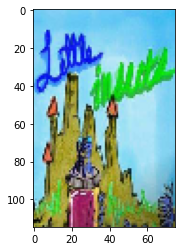

In [391]:
plt.imshow(val_imgs[11])

In [390]:
val_np_imgs = np.array(val_imgs)
val_np_imgs.shape

(10880, 115, 75, 3)

In [392]:
x_train_2 ,x_test_2, y_train_2, y_test_2 = train_test_split(val_np_imgs, y, random_state = 7, test_size = 0.2)

In [393]:
y_train_2.values.reshape((-1,1))

array([['drama'],
       ['social'],
       ['documentary'],
       ...,
       ['action'],
       ['action'],
       ['animation']], dtype=object)

Convolutional input layer, 32 feature maps with a size of 3×3, a rectifier activation function and a weight constraint of max norm set to 3.
Dropout set to 20%.
Convolutional layer, 32 feature maps with a size of 3×3, a rectifier activation function and a weight constraint of max norm set to 3.
Max Pool layer with size 2×2.
Flatten layer.
Fully connected layer with 128 units and a rectifier activation function.
Dropout set to 50%.
Fully connected output layer with 10 units and a softmax activation function.
A logarithmic loss function is used with the stochastic gradient descent optimization algorithm configured with a large momentum and weight decay start with a learning rate of 0.01.

In [394]:
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization,Conv2D,MaxPool2D

# Initialising the CNN
model = Sequential()

#First Convulation Layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape = x_train_2[0].shape ))
model.add(BatchNormalization())
#Pooling
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))

#Second Convulation Layer
model.add(Conv2D(64,(5,5),activation='relu',input_shape = x_train_2[0].shape ))
model.add(BatchNormalization())
#Pooling
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))

#Third Convulation Layer
model.add(Conv2D(128,(3,3),activation='relu',input_shape = x_train_2[0].shape ))
model.add(BatchNormalization())
#Pooling
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))

#Fourth Convulation Layer
model.add(Conv2D(128,(3,3),activation='relu',input_shape = x_train_2[0].shape ))
model.add(BatchNormalization())
#Pooling
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))

#Flattening Layer
model.add(Flatten()) 

#First full connection Layer
model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

#Second full connection Layer
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


#Output Layer
model.add(Dense(10, activation='sigmoid'))

In [395]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 113, 73, 32)       896       
_________________________________________________________________
batch_normalization (BatchNo (None, 113, 73, 32)       128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 56, 36, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 56, 36, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 52, 32, 64)        51264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 52, 32, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 26, 16, 64)        0

In [396]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [379]:
history = model.fit(x_train_2, y_train_2, epochs = 10, validation_data = (x_test_2, y_test_2))

In [400]:
print("Accuracy :", history.history['val_acc'][-1])

0.5401


The final step is to predict for the evaluation dataset given dataset. First we uploaded the csv file.

In [223]:
from google.colab import files
uploaded = files.upload()

Saving eval_set.csv to eval_set (2).csv


In [224]:
import io
data2 = pd.read_csv(io.BytesIO(uploaded['eval_set.csv']))
data2.head(10)

,video_id,title_fa,description_fa,age_rating,country_fa,production_year,duration,image
0,E0yLLCIp,دونده هزارتو,NaN,,آمریکا,2014.0,01:54:00,videos_covers_921fbbc1-0d58-4378-8e5b-92193edf...
1,wCFnNqf6,ماجراهای اسکوارت,در کارتون ماجراهای اسکوارت : سرزمین رویاهای کو...,7.0,کانادا,2003.0,00:49:01,videos_covers_f27599fe-0d9a-47ce-b796-997b2429...
2,2gZF76hm,خانم یایا,عبدالرضا کاهانی نویسنده و کارگردان زاده ۱ دی ۱...,13.0,ایران,2019.0,01:19:15,videos_covers_589607ad-e02f-443f-91f7-ac6c2388...
3,HrSbo_Fullmetal_Alchemist_E_filimo_series,کیمیاگر تمام فلزی,بعد از یک آزمایش شکست خورده کیمیاگری برای زند...,7.0,ژاپن,2003.0,,videos_covers_08cff5a5-0b18-4df5-ac8d-02744a74...
4,Bring_Me_the_Head_of_Alfredo_Garcia_5txA1_filimo,سر آلفردو گارسیا را برایم بیاورید,فیلم سر آلفردو گارسیا را برایم بیاورید اثر کمت...,17.0,آمریکا,1974.0,01:17:11,videos_covers_393f9008-f5fd-43cc-b222-4b28c060...
5,ZlBNT1y8,فورتیتود,داستان سریال «فورتیتود» در مورد شهر کوچیکی در ...,17.0,انگلیس,2015.0,,videos_covers_d6c26c12-a520-4526-a0e2-53b4d926...
6,_70ztU_filimo,اصفهان سمفونی یک شهر,این مستند سعی می کند شهر اصفهان را به مثابه یک...,17.0,ایران,2010.0,00:35:18,videos_covers_8635bfa9-7bbb-4002-ade5-9ce74674...
7,The_Swan_Princess_Princess_Tomorrow_Pirate_Tod...,پرنسس قوها :دزد دریایی,پرنسس قو و دوستانش سفری را در دریا آغاز میکنن...,3.0,آمریکا,2016.0,01:18:52,videos_covers_004a7458-8919-4b0d-ad3d-01535f36...
8,JPbXU8DP,همزاد,NaN,,آمریکا,2008.0,02:12:00,videos_covers_eaf9eaa9-8daf-4034-aca8-47104d32...
9,TbZ1aYcs,دردسر میمون,میمون خانگی ایوا به قصد جیب بُری از خانه بیرون...,13.0,ژاپن,1994.0,01:29:05,videos_covers_4f8d47e9-e637-4424-aa87-965c3ed5...


In [342]:
data = data2

Now we apply the preprocesses we did in the training phase. First we droped video_id then replaced all cells with only space instead of value with NaN.

In [343]:
data = data.drop(columns = ['video_id'])

In [344]:
data = data.replace(r'^\s*$', np.NaN, regex=True)

In [345]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1554 entries, 0 to 1553
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title_fa         1554 non-null   object 
 1   description_fa   1215 non-null   object 
 2   age_rating       1146 non-null   object 
 3   country_fa       1542 non-null   object 
 4   production_year  1554 non-null   float64
 5   duration         1420 non-null   object 
 6   image            1554 non-null   object 
dtypes: float64(1), object(6)
memory usage: 85.1+ KB


Now, we filled the NaN values like we did in training phase.

In [346]:
data['age_rating'].fillna(dataframe['age_rating'].mean(), inplace = True)

In [347]:
data['country_fa'].fillna("آمریکا", inplace = True)

In [348]:
data['age_rating'] = dataframe['age_rating'].astype(int)

In [349]:
data['duration'] = pd.to_datetime(data['duration'])

In [350]:
data['hour'] = data['duration'].dt.hour
data['minute'] = data['duration'].dt.minute

In [351]:
data['minute'] = data['minute'].replace(0, np.NaN)

In [352]:
data = data.apply(dateHandler, axis = 'columns')
data = data.drop(columns = ['hour', 'duration'])

In [353]:
data['minute'] = data['minute'].fillna(data['minute'].mean())
data['age_rating'].fillna(dataframe['age_rating'].mean(), inplace = True)
data.isnull().sum()

title_fa             0
description_fa     339
age_rating           0
country_fa           0
production_year      0
image                0
minute               0
dtype: int64

In [354]:
data.head(10)

,title_fa,description_fa,age_rating,country_fa,production_year,image,minute
0,دونده هزارتو,NaN,0.0,آمریکا,2014.0,videos_covers_921fbbc1-0d58-4378-8e5b-92193edf...,114.000000
1,ماجراهای اسکوارت,در کارتون ماجراهای اسکوارت : سرزمین رویاهای کو...,11.0,کانادا,2003.0,videos_covers_f27599fe-0d9a-47ce-b796-997b2429...,49.000000
2,خانم یایا,عبدالرضا کاهانی نویسنده و کارگردان زاده ۱ دی ۱...,0.0,ایران,2019.0,videos_covers_589607ad-e02f-443f-91f7-ac6c2388...,79.000000
3,کیمیاگر تمام فلزی,بعد از یک آزمایش شکست خورده کیمیاگری برای زند...,7.0,ژاپن,2003.0,videos_covers_08cff5a5-0b18-4df5-ac8d-02744a74...,85.938122
4,سر آلفردو گارسیا را برایم بیاورید,فیلم سر آلفردو گارسیا را برایم بیاورید اثر کمت...,13.0,آمریکا,1974.0,videos_covers_393f9008-f5fd-43cc-b222-4b28c060...,77.000000
5,فورتیتود,داستان سریال «فورتیتود» در مورد شهر کوچیکی در ...,13.0,انگلیس,2015.0,videos_covers_d6c26c12-a520-4526-a0e2-53b4d926...,85.938122
6,اصفهان سمفونی یک شهر,این مستند سعی می کند شهر اصفهان را به مثابه یک...,13.0,ایران,2010.0,videos_covers_8635bfa9-7bbb-4002-ade5-9ce74674...,35.000000
7,پرنسس قوها :دزد دریایی,پرنسس قو و دوستانش سفری را در دریا آغاز میکنن...,3.0,آمریکا,2016.0,videos_covers_004a7458-8919-4b0d-ad3d-01535f36...,78.000000
8,همزاد,NaN,9.0,آمریکا,2008.0,videos_covers_eaf9eaa9-8daf-4034-aca8-47104d32...,132.000000
9,دردسر میمون,میمون خانگی ایوا به قصد جیب بُری از خانه بیرون...,13.0,ژاپن,1994.0,videos_covers_4f8d47e9-e637-4424-aa87-965c3ed5...,89.000000


In [355]:
data['production_year'] = data['production_year'].astype(float)
data['production_year'] = data['production_year'].astype(int)
data['minute'] = data['minute'].astype(int)

In [356]:
data = data.drop(columns = ['production_year'])

In [357]:
data.isnull().sum()

title_fa            0
description_fa    339
age_rating          0
country_fa          0
image               0
minute              0
dtype: int64

In [358]:
for column in X_train.columns:
    if column not in data.columns:
        data[column] = 0

In [359]:
data = data.drop(columns = ['country_fa'])

In [360]:
data['description_fa'] = data['description_fa'].astype(str)
data['title_fa'] = data['title_fa'].astype(str)

The next step is to do the processes needed for text processing.

In [361]:
def preprocessTextofColumn(columnName):
    normalizer = hazm.Normalizer()
    tokenizer = hazm.WordTokenizer()
    lemmatizer = hazm.Lemmatizer()
    ENGStopWords = set(stopwords.words('english'))
    PERStopWords = set(hazm.utils.stopwords_list())
    PERStopWords = PERStopWords.union({':','ی','ای',',','،','(',')',':',';','-','_','.','/','+','=','?'})
    stopWords = ENGStopWords.union(PERStopWords)
    allWords = []
    for index, row in data.iterrows():
        text = row['title_fa'] + ' ' + row[columnName]
        normalizedText = normalizer.affix_spacing(text)
        words = tokenizer.tokenize(normalizedText)
        filteredWords = []
        for word in words:
            if not word in stopWords:
                filteredWords.append(lemmatizer.lemmatize(word.lower()))
        allWords.append(filteredWords)
    newColumnName = 'Words'
    data[newColumnName] = allWords
    return data

In [362]:
data = preprocessTextofColumn('description_fa')

In [363]:
data = data.drop(columns = ['description_fa', 'title_fa'])

In [364]:
for key in descDictionary:
    data['desc_' + key] = 0
    data['desc_' + key] = data['Words'].apply(lambda x : 1 if key in x else 0)
data = data.drop(columns = ['Words'])

In [365]:
data = data.drop(columns = ['image'])

In [366]:
data.head(10)

,age_rating,minute,country_-,country_آرژانتین,country_آفریقای جنوبی,country_آفریقای جنوبی,country_آفریقای شمالی,country_آلمان,country_آلمان,country_آمریکا,country_آمریکا,country_اتریش,country_اتریش,country_استرالیا,country_استرالیا,country_اسپانیا,country_اسپانیا,country_افغانستان,country_امارات متحده عربی,country_امارات متحده عربی,country_اندونزی,country_اندونزی,country_انگلستان,country_انگلستان,country_انگلیس,country_اوکراین,country_ایالات متحده آمریکا,country_ایتالیا,country_ایتالیا,country_ایران,country_ایرلند,country_ایرلند,country_ایسلند,country_ایسلند,country_برزیل,country_بلژیک,country_بلژیک,country_تایلند,country_تایلند,country_تایوان,...,desc_موسسه,desc_پرداخته,desc_پرستو,desc_انتقاد,desc_سهراب,desc_خونه,desc_محوریت,desc_هسته‌ای,desc_دنیرو,desc_درآمده,desc_براون,desc_نوزدهم,desc_آنابل,desc_ثانیه,desc_زباله,desc_خرمشهر,desc_ماسک,desc_پیشتاز,desc_زورو,desc_درخشش,desc_عاشورا,desc_ویک,desc_گمان,desc_مسخره,desc_ششم,desc_ساموئل,desc_17.0,desc_آستریکس,desc_غلامرضا,desc_کوروساوا,desc_۲۰۰,desc_ممنوع,desc_داور,desc_نشدن,desc_کیان,desc_سوارکار,desc_اتمام,desc_مراحل,desc_الکساندریا,desc_میگردند
0,0.0,114,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,11.0,49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.0,79,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,7.0,85,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,13.0,77,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,13.0,85,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,13.0,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,3.0,78,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,9.0,132,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,13.0,89,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Now we predict using the best model we developed during this project which was adaboost and saved our predictions in a csv file named predictions.csv and upoaded it with other files.

In [367]:
ada_clf_pred3 = ada_clf2.predict(data)

In [370]:
ada_clf_pred3

array(['action', 'documentary', 'family', ..., 'action', 'action',
       'action'], dtype='<U11')

In [406]:
import csv
with open("predictions.csv", 'w', newline='\n') as myfile:
     wr = csv.writer(myfile, quoting=csv.QUOTE_ALL)
     wr.writerow(ada_clf_pred3)

# Conclusion:
In this project, we reached an accuracy of 61% using adaboost and predicted the calsses for the given validation dataset. As we mentioned before, we would have reached a better accuracy if below problems get fixed:
- The number of rows with missing values were high, about 2500 rows, so the best accuracy theoretically possible is about 75%. Also, the baseline of this problem is about 21% accuracy which is the situation if we classify every film as action which is the most frequent genre.
- The second problem is the problems of hazm library. It is widely accepted that languauge processing tools available for persian language are less enhanced and developed ones versus the tools available for english language.
- The third problem is the computational power and storag available to us.
- Unfortunately, we did not have enough resources and gpu to complete transfer learning method discussed before and only used CNN for images and did not use all information we had.